1. Preprocess the 20 Newsgroup dataset and visualize its statistical information (e.g., term-frequency distribution).

Loading 20newsgroups dataset and pre-processing

In [3]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

In [4]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups

# we load both training and testing splits as our final project mainly focuses on the unsupervised setting. 
raw_dataset = fetch_20newsgroups(subset='all', shuffle=False)
print(raw_dataset.data[0])

From: cubbie@garnet.berkeley.edu (                               )
Subject: Re: Cubs behind Marlins? How?
Article-I.D.: agate.1pt592$f9a
Organization: University of California, Berkeley
Lines: 12
NNTP-Posting-Host: garnet.berkeley.edu


gajarsky@pilot.njin.net writes:

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

       This season so far, Morgan and Guzman helped to lead the Cubs
       at top in ERA, even better than THE rotation at Atlanta.
       Cubs ERA at 0.056 while Braves at 0.059. We know it is early
       in the season, we Cubs fans have learned how to enjoy the
       short triumph while it is still there.



In [5]:
# Sklearn already implements an interface for this step.
dataset = fetch_20newsgroups(subset='all', shuffle=False, remove=('headers', 'footers', 'quotes'))
print(dataset.data[0])


morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)


In [6]:
corpus = dataset.data # save as the raw docs
labels = dataset.target # labels for clustering evaluation or supervised tasks
print(len(corpus), len(labels))
print(labels)
print(dataset.target_names)

18846 18846
[ 9  4 11 ...  4  6  7]
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [7]:
# Let's show the first 10 documents
for i in range(10):
    doc = corpus[i]
    category = dataset.target_names[labels[i]]
    print("The {}-th sent of {}: {}".format(i+1, category, doc))
    print("==================================================\n")

The 1-th sent of rec.sport.baseball: 
morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)

The 2-th sent of comp.sys.mac.hardware: Well, I just got my Centris 610 yesterday.  It took just over two 
weeks from placing the order.  The dealer (Rutgers computer store) 
appologized because Apple made a substitution on my order.  I ordered
the one without ethernet, but they substituted one _with_ ethernet.
He wanted to know if that would be "alright with me"!!!  They must
be backlogged on Centri w/out ethernet so they're just shipping them
with!  

	Anyway, I'm very happy with the 610 with a few exceptions.  
Being nosy, I decided to open it up _before_ powering it on for the first
time.  The SCSI cable to the hard drive was only partially connected
(must have come loose in shipping).  No big deal, but I would have been
pissed if I tried to boot it and it wou

In [8]:
# So, apparently, we need do more Pre-processing step
from collections import defaultdict
from nltk.tokenize import RegexpTokenizer
from nltk.stem.porter import PorterStemmer
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords, preprocess_string
from pprint import pprint
from nltk.corpus import stopwords
from gensim.utils import lemmatize, simple_preprocess
import gensim, spacy, logging, warnings
import re, numpy as np, pandas as pd
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords = stopwords.words('english')


def pre_processing(docs):
    tokenizer = RegexpTokenizer(r"\w+(?:[-'+]\w+)*|\w+")
    for doc in docs:
        raw_text = doc.lower()
        # tokenization
        tokens_text = tokenizer.tokenize(raw_text)
        # remove stopwords
        stopped_tokens_text = [i for i in tokens_text if not i in stopwords]
        # remoce digis and one-charcter word
        doc = [token for token in stopped_tokens_text if not token.isnumeric()]
        doc = [token for token in stopped_tokens_text if len(token) > 1]
        # you could always add some new preprocessing here
        yield doc
        

def process_words(texts, stop_words=stopwords, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]
    texts_out = []
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    # remove stopwords once more after lemmatization
    texts_out = [[word for word in simple_preprocess(str(doc)) if word not in stop_words and len(word)>2 and word.isalpha()] for doc in texts_out]    
    return texts_out

def sent_to_words(sentences):
    for sent in sentences:
        sent = re.sub('\s+', ' ', sent)  # removing newline characters
        sent = re.sub("\'", "", sent)  # removing single quotes
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)

data_words = list(sent_to_words(corpus))
wholecorpus = process_words(data_words)  # processed Text Data!

doc1 = remove_stopwords(corpus[0])
doc2 = preprocess_string(corpus[0])
doc3 = next(pre_processing([corpus[0]]))
print(dataset.data[0])
print(doc1)
print("=========================")
print(doc2)
print(doc3)
print(len(wholecorpus))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.

morgan and guzman will have era's 1 run higher than last year, and
 the cubs will be idiots and not pitch harkey as much as hibbard.
 castillo won't be good (i think he's a stud pitcher)
morgan guzman era's 1 run higher year, cubs idiots pitch harkey hibbard. castillo won't good (i think he's stud pitcher)
['morgan', 'guzman', 'era', 'run', 'higher', 'year', 'cub', 'idiot', 'pitch', 'harkei', 'hibbard', 'castillo', 'won', 'good', 'think', 'stud', 'pitcher']
['morgan', 'guzman', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', "he's", 'stud', 'pitcher']
18846


In [9]:
# Let's first get a new corpus by using one tokenization method above
# Also, for illustration purpose, we only take the first 1000 docs from the original corpus
corpus1 = list(pre_processing(corpus[:1000]))
print(len(corpus1))
print(corpus1[0])
# Then we build the vocab
freqs = defaultdict(int)
for doc in corpus1:
    for w in doc:
        freqs[w] += 1
print(len(freqs))
vocab = [w for w in freqs if freqs[w]>1]
print(len(vocab))

1000
['morgan', 'guzman', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', "he's", 'stud', 'pitcher']
20553
10103


In [10]:
from copy import deepcopy
from gensim.corpora import Dictionary
# A more efficient way is to use gensim.corpora
dictionary = corpora.Dictionary(corpus1)
print(dictionary)
# Prune the dict by filtering with document freq (DF)
dict1 = deepcopy(dictionary)
dict1.filter_extremes(no_below=5, no_above=0.5)# no_below and no_above are related to DF
print(dict1)
dict2 = deepcopy(dictionary)
dict2.filter_extremes(no_below=5, no_above=0.5, keep_n=2000)
print(dict2)
# You may also use the freqs to filter dict with TF
low_tf_tokens = [w for w in freqs if freqs[w]<=3]
remove_ids = [dictionary.token2id[w] for w in low_tf_tokens]
print(len(remove_ids))
dictionary.filter_tokens(remove_ids)
dictionary.compactify()  # remove gaps in id sequence after words that were removed
print(dictionary)
# dictionray.cfs collects all the term freqs, similar to freqs
# Let's check if the new dictionary still has token with a tf <= 3
# print(len([w for w in dictionary.cfs if dictionary.cfs[w]<=3]))


Dictionary(20553 unique tokens: ['castillo', 'cubs', "era's", 'good', 'guzman']...)
Dictionary(2855 unique tokens: ['good', "he's", 'higher', 'last', 'much']...)
Dictionary(2000 unique tokens: ['good', "he's", 'higher', 'last', 'much']...)
15609
Dictionary(4944 unique tokens: ['cubs', 'good', "he's", 'higher', 'last']...)


In [11]:
# You vocab/dictionary finally define your corpus
pprint(dictionary.token2id)

{'00': 1938,
 '000': 1161,
 '00000011': 4790,
 '00001100': 4791,
 '00010001b': 4792,
 '00100010b': 4793,
 '00110000': 4794,
 '00110011': 4795,
 '00111100': 4796,
 '01': 2943,
 '01000100b': 4797,
 '04': 3328,
 '040': 4743,
 '06': 3347,
 '0q': 831,
 '0qax': 832,
 '0t': 833,
 '0tbxn': 834,
 '0tq': 835,
 '10': 88,
 '100': 667,
 '1000': 2761,
 '10001000b': 4798,
 '101': 3603,
 '1020': 4928,
 '1035': 4929,
 '1036': 4930,
 '1037': 4931,
 '104': 4040,
 '1055': 4932,
 '1062': 4933,
 '108': 89,
 '10mhz': 4767,
 '11': 90,
 '110': 2944,
 '11000000': 4799,
 '11000011': 4800,
 '11001100': 4801,
 '1114': 91,
 '112': 4041,
 '113': 92,
 '116': 762,
 '12': 93,
 '120': 3381,
 '123': 3004,
 '125': 4024,
 '128': 3796,
 '13': 1282,
 '130': 94,
 '132': 4581,
 '133': 4475,
 '135': 4658,
 '136': 4911,
 '14': 95,
 '1400': 3808,
 '141': 4898,
 '144': 4912,
 '145': 4853,
 '147': 4854,
 '15': 96,
 '150': 724,
 '16': 2716,
 '160': 3723,
 '161': 4913,
 '163': 986,
 '165': 4724,
 '168': 3382,
 '17': 97,
 '172': 4582,

In [12]:
corpus1_bows = [dictionary.doc2bow(doc) for doc in corpus1]
corpus2_bows = [dict2.doc2bow(doc) for doc in corpus1]
print([len(corpus1_bows), len(corpus2_bows)])
print(corpus1_bows[0])
print(corpus2_bows[0])
# Let's see the text difference
print('Preprocess Text: {}'.format(' '.join([w for w in corpus1[0]])))
print('Using dictionary: {}'.format(' '.join([dictionary[wid] for wid,_ in corpus1_bows[0]])))
print('Using dict2: {}'.format(' '.join([dict2[wid] for wid,_ in corpus2_bows[0]])))

[1000, 1000]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1)]
[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1)]
Preprocess Text: morgan guzman era's run higher last year cubs idiots pitch harkey much hibbard castillo good think he's stud pitcher
Using dictionary: cubs good he's higher last much pitch pitcher run think year
Using dict2: good he's higher last much run think year


In [13]:
new_corpus = [[w for w in doc if w in dictionary.token2id] for doc in corpus1]
print(len(new_corpus))
print(corpus1[0])
print(new_corpus[0])

1000
['morgan', 'guzman', "era's", 'run', 'higher', 'last', 'year', 'cubs', 'idiots', 'pitch', 'harkey', 'much', 'hibbard', 'castillo', 'good', 'think', "he's", 'stud', 'pitcher']
['run', 'higher', 'last', 'year', 'cubs', 'pitch', 'much', 'good', 'think', "he's", 'pitcher']


Visualizing statistical information

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
  # of docs    # of words    # of unique words    min words    max words    mean words    std of words
-----------  ------------  -------------------  -----------  -----------  ------------  --------------
      18846       1761662                95013            0         9300       138.735         392.667


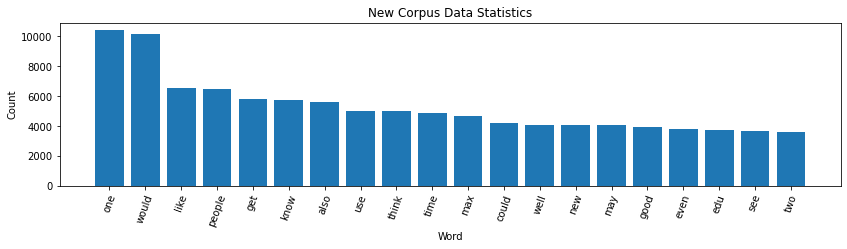

In [14]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import gensim
from tabulate import tabulate
import statistics

stoplist = stopwords.words('english')

tokens = []
tokenCount = {}
wordsCount = []
no_of_docs = 0

for doc in dataset.data:
    # print(doc)
    no_of_docs = no_of_docs + 1
    words = gensim.utils.simple_preprocess(doc, True, 3)
    wordsCount.append(len(words))
    words_list_per_doc = []
    for word in words:
        if word not in stoplist:
            tokens.append(word)
            words_list_per_doc.append(word)
    # print(words_list_per_doc)

stats = [[no_of_docs, len(tokens), len(set(tokens)),
          min(wordsCount), max(wordsCount), statistics.mean(wordsCount), statistics.stdev(wordsCount)]]
print(tabulate(stats, headers=["# of docs",
                               "# of words", "# of unique words",
                               "min words", "max words", "mean words", "std of words"]))
with open('pre_process_stats.txt', 'w') as outputfile:
    outputfile.write(
        tabulate(stats, headers=["# of docs",
                                 "# of words", "# of unique words",
                                 "min words", "max words", "mean words", "std of words"]))

for word in tokens:
    tokenCount[word] = tokenCount.get(word, 0) + 1

plt.figure(figsize=(14, 3))
plt.title('New Corpus Data Statistics')
plt.xlabel('Word')
plt.xticks(rotation=70)
plt.ylabel('Count')
plt.bar(*zip(*sorted(tokenCount.items(),key=lambda x: x[1], reverse=True)[:20]))
plt.show()

In [15]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

2.Build and save your vocabulary (termed as Vocab_v1) upon Step 1. Learn Bag-of-words (BoW) and TF-IDF model for all the documents.

Learning BOW(Bag-of-words)

In [16]:
#Vocabulary with whole corpus
import gensim as gm
from gensim.corpora import Dictionary
vocab_v1 = gm.corpora.Dictionary(wholecorpus)

#Bag of Words with all words vocabulary
BOW_alldata = [vocab_v1.doc2bow(doc) for doc in wholecorpus] 

In [17]:
for doc in BOW_alldata[0:4]:
    print(doc)
len(BOW_alldata)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1)]
[(7, 1), (8, 1), (14, 1), (15, 3), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 2), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 1), (37, 2), (38, 3), (39, 1), (40, 1), (41, 1), (42, 1), (43, 1), (44, 1), (45, 1), (46, 2), (47, 1), (48, 2), (49, 1), (50, 1), (51, 1), (52, 1), (53, 1), (54, 1), (55, 1), (56, 1), (57, 1), (58, 1), (59, 1), (60, 1), (61, 2), (62, 3), (63, 1), (64, 3), (65, 1), (66, 1), (67, 1), (68, 3), (69, 1), (70, 1), (71, 1), (72, 1), (73, 2), (74, 1), (75, 1), (76, 1), (77, 1), (78, 1), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 2), (86, 1), (87, 1), (88, 1), (89, 1), (90, 3), (91, 1)]
[(1, 2), (6, 1), (13, 2), (15, 2), (29, 12), (41, 1), (43, 2), (44, 2), (58, 4), (60, 4), (64, 2), (73, 1), (80, 3), (83, 1), (86, 1), (92, 1), (93, 1), (94, 1), (9

18846

Learning TF-IDF model

In [18]:
#tdidf for new_corpus
from gensim import models
tfidf1= models.TfidfModel(BOW_alldata)
tfidf_alldata = tfidf1[BOW_alldata]

In [19]:
for doc in tfidf_alldata:
    print(doc)
    break
len(tfidf_alldata)

[(0, 0.3201955098292674), (1, 0.08673537992914704), (2, 0.4698507125426506), (3, 0.4698507125426506), (4, 0.30296456577771996), (5, 0.26916333027747474), (6, 0.11843620032528557), (7, 0.0978479489075092), (8, 0.2273184200424486), (9, 0.23643736851376762), (10, 0.11564249178698406), (11, 0.35124765261397617), (12, 0.07718867703639029), (13, 0.10154880357610517)]


18846

3.Train a LDA model with Vocab_v1. Visualize topics with at least two different methods, and get the topic distribution (as features) for each document.

Training a LDA model with vocab_v1

In [20]:
#Lda model on BOW for all data
from gensim.models import LdaMulticore
lda_model_all = LdaMulticore(corpus=BOW_alldata, num_topics=20, id2word=vocab_v1, workers=4, passes=20)

In [21]:
lda_model_all.print_topics()

[(0,
  '0.010*"people" + 0.008*"say" + 0.008*"claim" + 0.008*"armenian" + 0.007*"belief" + 0.007*"believe" + 0.007*"turkish" + 0.006*"evidence" + 0.006*"religion" + 0.006*"exist"'),
 (1,
  '0.019*"homosexual" + 0.012*"homosexuality" + 0.011*"sex" + 0.010*"man" + 0.007*"gay" + 0.007*"male" + 0.007*"theory" + 0.007*"use" + 0.006*"people" + 0.006*"would"'),
 (2,
  '0.013*"use" + 0.013*"key" + 0.011*"would" + 0.011*"government" + 0.007*"chip" + 0.007*"may" + 0.007*"encryption" + 0.006*"system" + 0.005*"phone" + 0.005*"technology"'),
 (3,
  '0.025*"say" + 0.012*"come" + 0.010*"see" + 0.010*"people" + 0.010*"kill" + 0.009*"child" + 0.009*"know" + 0.009*"would" + 0.008*"could" + 0.008*"tell"'),
 (4,
  '0.030*"game" + 0.018*"team" + 0.017*"play" + 0.012*"goal" + 0.010*"score" + 0.010*"period" + 0.010*"entry" + 0.010*"player" + 0.008*"season" + 0.008*"playoff"'),
 (5,
  '0.014*"space" + 0.010*"earth" + 0.010*"planet" + 0.010*"launch" + 0.009*"appear" + 0.009*"orbit" + 0.008*"solar" + 0.008*"mis

In [22]:
#Print topics of LDA model
import pandas as pd;
def get_lda_topics(model, num_topics):
    word_dict = {};
    for i in range(num_topics):
        words = model.show_topic(i, topn = 30);
        word_dict['Topic # ' + '{:02d}'.format(i)] = [i[0] for i in words];
    return pd.DataFrame(word_dict);

get_lda_topics(lda_model_all, 20)

Topic # 00     Topic # 01   Topic # 02 Topic # 03 Topic # 04   Topic # 05  \
0      people     homosexual          use        say       game        space   
1         say  homosexuality          key       come       team        earth   
2       claim            sex        would        see       play       planet   
3    armenian            man   government     people       goal       launch   
4      belief            gay         chip       kill      score       appear   
5     believe           male          may      child     period        orbit   
6     turkish         theory   encryption       know      entry        solar   
7    evidence            use       system      would     player      mission   
8    religion         people        phone      could     season       system   
9       exist          would   technology       tell    playoff   spacecraft   
10    atheist         sexual      clipper      start        win      surface   
11   argument            may        could       take       lead    satellite   
12   genocide         larson         make      woman      first       energy   
13       many           show       public       home     hockey        first   
14        may          black          law        day       line         moon   
15    atheism       behavior         cost       time       year       degree   
16       fact           find      program      leave       shot        water   
17        see          issue     security       look     output         year   
18  statement   heterosexual          new        old        get        large   
19     reason          study  information       call      point   atmosphere   
20      would        believe         need       even       blue  temperature   
21       make         number         also       live    penalty        light   
22       find           time      privacy       hear     second          may   
23    village      physicist      project       year       file         copy   
24       true            see         even       dead       wing         high   
25       book       physical      private       back       rule          new   
26      point        general       design       body        may        field   
27  religious            say       agency        get       save        probe   
28       also       universe       people     happen       make      shuttle   
29        use           also       number       lose       show          fly   

   Topic # 06   Topic # 07  Topic # 08 Topic # 09 Topic # 10 Topic # 11  \
0         use       jewish       offer      would      would      would   
1     problem       church        sell        say      think        get   
2       would        would        sale       love        get      money   
3         may        group     include       know       year       know   
4       cause     religion        good        sin       game        buy   
5        test          may       price       come       good        pay   
6        much      israeli   condition     people       time       make   
7       power         arab         pit       word        see       drug   
8        good        state        book    believe        say     people   
9        make     movement    shipping       make     really  insurance   
10       take        child         ask        man       well       good   
11       high    religious   excellent       give       know       time   
12       wire         also         pay        see       last       take   
13        try    christian  interested        may      could       give   
14       time  commandment        also     church        hit       cost   
15        get          law        mail      thing       make      spend   
16       also         word    original      faith       come        use   
17    circuit      country         day       also        run      could   
18        see         feel        make       life     player       also   
19     ground         

a) Visualizing by pyLDAvis

In [23]:
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()
vis = gensimvis.prepare(lda_model_all, BOW_alldata, vocab_v1)
vis

     |████████████████████████████████| 1.7 MB 3.2 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
  Created wheel for pyLDAvis: filename=pyLDAvis-3.3.1-py2.py3-none-any.whl size=136898 sha256=3c899440e215a1ee5286f79ef9f52d115b760571244fa24c12be9392d9d92450
  Stored in directory: /root/.cache/pip/wheels/c9/21/f6/17bcf2667e8a68532ba2fbf6d5c72fdf4c7f7d9abfa4852d2f
Successfully built pyLDAvis


/usr/local/lib/python3.7/dist-packages/past/types/oldstr.py:5: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated since Python 3.3,and in 3.9 it will stop working
  from collections import Iterable
/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  by='saliency', ascending=False).head(R).drop('saliency', 1)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
17    -0.111006 -0.013754       1        1  12.634561
15     0.201494  0.066108       2        1  10.296448
19     0.145562 -0.057698       3        1   8.313562
2      0.021929  0.068936       4        1   7.071400
9     -0.137437 -0.000456       5        1   6.806835
10    -0.063670 -0.158174       6        1   6.669844
14     0.084455 -0.131221       7        1   6.599773
0     -0.126585  0.106457       8        1   5.634579
18    -0.134649 -0.026789       9        1   4.718027
13    -0.077846  0.154902      10        1   4.647984
6      0.040221 -0.060240      11        1   4.016987
3     -0.135609 -0.165083      12        1   3.921808
11    -0.029927 -0.095808      13        1   3.419340
12     0.166058  0.012764      14        1   2.875715
4      0.024902 -0.090517      15        1   2.820729
5      0.071868  0.097283      16        1   2.818731
1     -0.060832  0.117079      17        1   1.964800
8      0.127756  0.021335      18        1   1.847370
7     -0.104421  0.126202      19        1   1.481409
16     0.097735  0.028672      20        1   1.440098, topic_info=       Term          Freq         Total Category  logprob  loglift
701     max   2710.000000   2710.000000  Default  30.0000  30.0000
189    file   3932.000000   3932.000000  Default  29.0000  29.0000
2036  image   2128.000000   2128.000000  Default  28.0000  28.0000
631    game   2053.000000   2053.000000  Default  27.0000  27.0000
347     use  10186.000000  10186.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
60      may    115.453707   5998.974320  Topic20  -5.0783   0.2900
43    first     93.929301   3241.914303  Topic20  -5.2846   0.6991
252    part     82.479511   2050.938533  Topic20  -5.4146   1.0270
53     know     82.673368   7501.851532  Topic20  -5.4123  -0.2675
59     make     81.456346   6814.899551  Topic20  -5.4271  -0.1863

[1620 rows x 6 columns], token_table=       Topic      Freq      Term
term                            
7339       1  0.083581  abortion
7339       4  0.031343  abortion
7339       8  0.062686  abortion
7339      13  0.794019  abortion
7339      19  0.010448  abortion
...      ...       ...       ...
40003     12  0.954645   zhasman
13893     11  0.980763      zinc
9029       1  0.984254   zionism
7206       1  0.386785   zionist
7206      19  0.603384   zionist

[6889 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[18, 16, 20, 3, 10, 11, 15, 1, 19, 14, 7, 4, 12, 13, 5, 6, 2, 9, 8, 17])

b) Visualizing by WordCloud

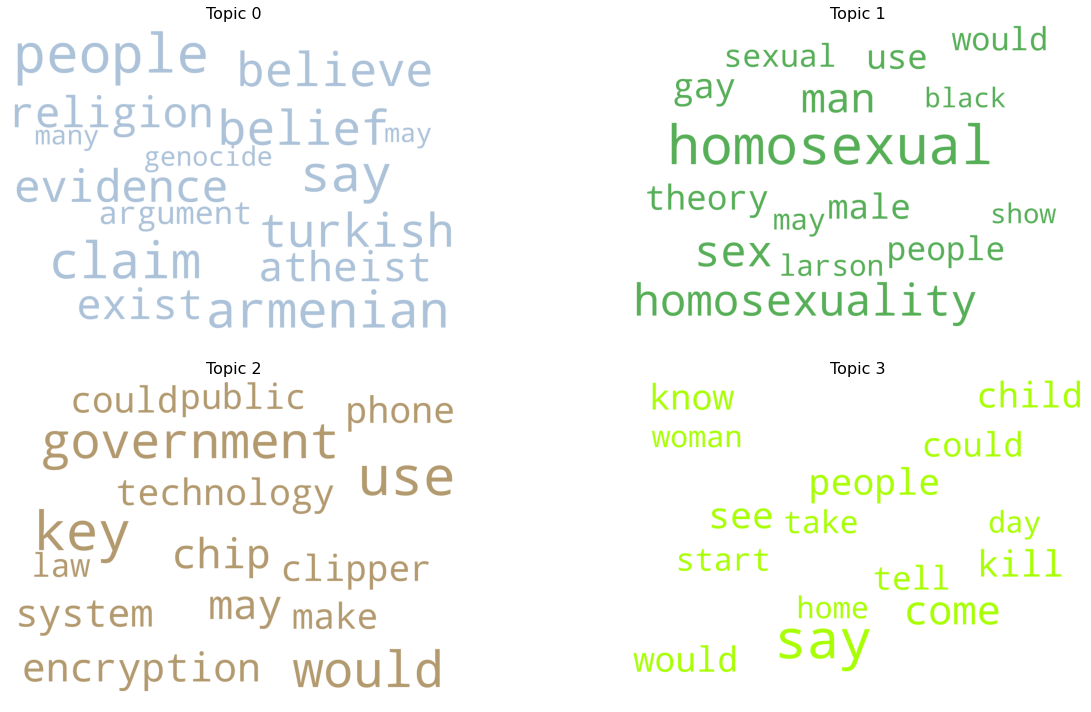

In [24]:
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

#Wordcloud visualization of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.XKCD_COLORS.items()]
        #TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=15,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model_all.show_topics(formatted=False, num_topics=20, num_words=15)

fig, axes = plt.subplots(2, 2, figsize=(20,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

4.Train Word2Vec and Doc2Vec models upon Vocab_v1. Visualize your learned word and document embedding space (e.g., using t-SNE1). Collect Doc2Vec representation of each document.

Training Word2Vec model on vocab_v1

In [25]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
    
from gensim.models import Word2Vec

word2vec = Word2Vec(wholecorpus, min_count=1)

Visualizing word embedding space by PCA

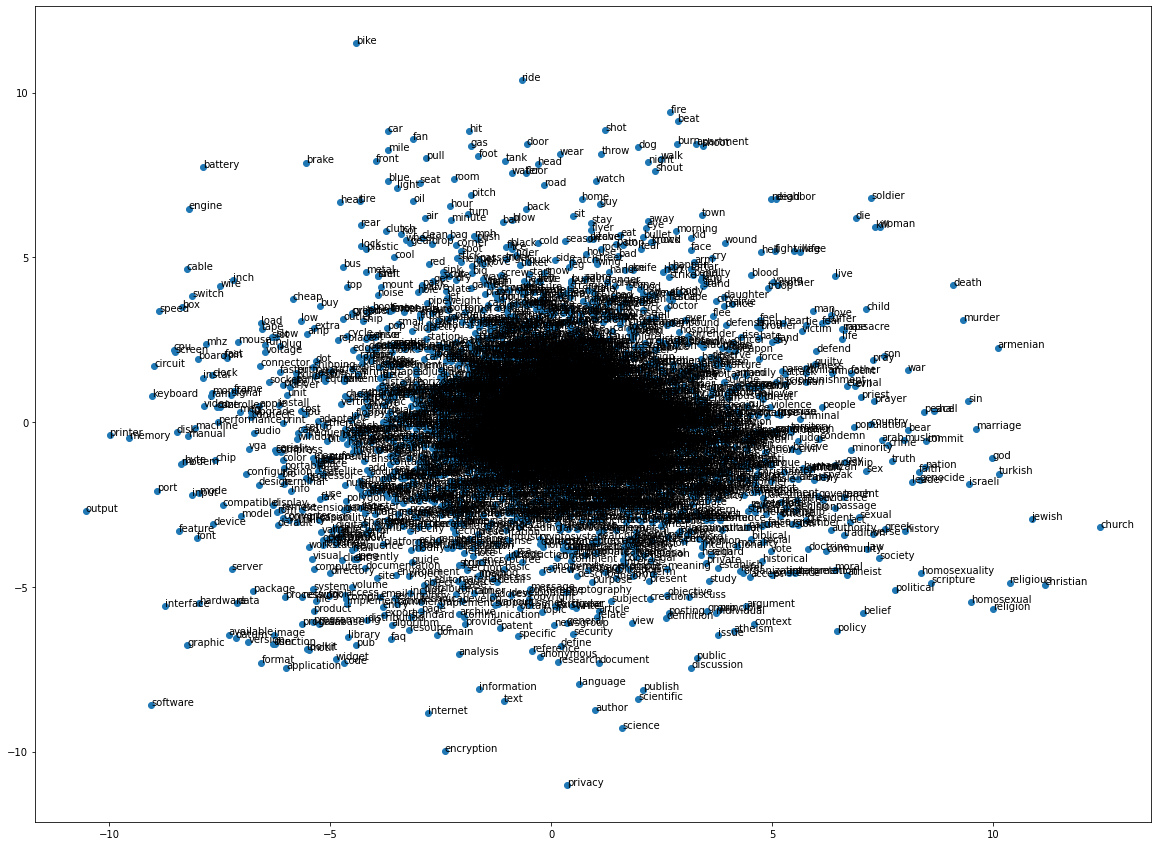

In [26]:
from sklearn.decomposition import PCA
from matplotlib import pyplot
word2vec = Word2Vec(wholecorpus, size=100, window=20, min_count=20, workers=4)
X = word2vec[word2vec.wv.vocab]
pca = PCA(n_components=2)
result = pca.fit_transform(X)
pyplot.figure(figsize=(20, 15))
pyplot.scatter(result[:, 0], result[:, 1])
words = list(word2vec.wv.vocab)
for i, word in enumerate(words):
	pyplot.annotate(word, xy=(result[i, 0], result[i, 1]))
pyplot.show()

In [27]:
from matplotlib import pyplot as plt
from gensim.models import Word2Vec
word2vec_model2 =Word2Vec(wholecorpus, size=100, window=20, min_count=1000, workers=4)
import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

Visualizing word embedding space by TSNE

In [3]:
#word2vec_model_for few words
from matplotlib import pyplot as plt
from sklearn.manifold import TSNE

def tsne_plot(model):
    "Creates TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(8, 8)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


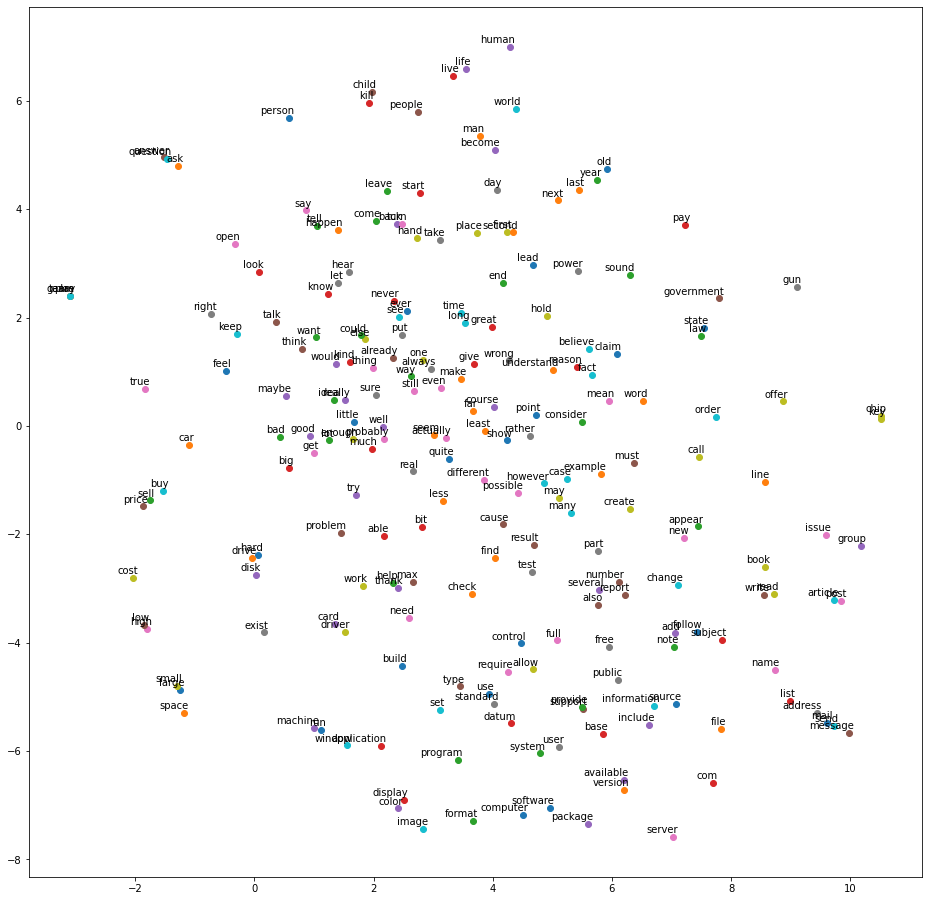

In [29]:
tsne_plot(word2vec_model2)

Training Doc2Vec model on vocab_v1

In [30]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

doc2vec_alldata = [TaggedDocument(doc, [i]) for i, doc in enumerate(wholecorpus)]
doc2vec_model = Doc2Vec(window=5, min_count=1, workers=4)
doc2vec_model.build_vocab(doc2vec_alldata)
doc2vec_model.train(doc2vec_alldata, total_examples=len(doc2vec_alldata), epochs=10)

Visualizing Document embedding space by TSNE

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


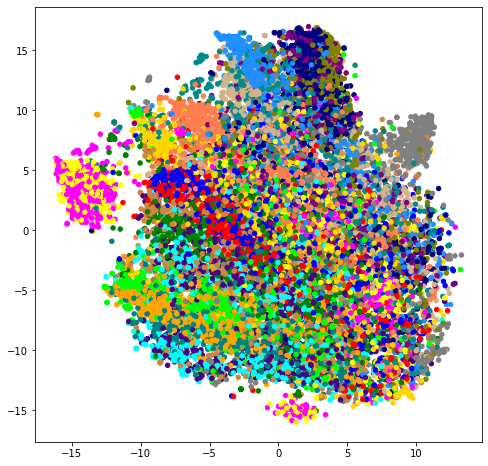

In [42]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import pandas as pd

tsne = TSNE(n_components=2, n_iter=300, perplexity=200.0, early_exaggeration=20.0)
tsne_d2v = tsne.fit_transform(doc2vec_model.docvecs.vectors_docs)
tsne_d2v_df = pd.DataFrame(data=tsne_d2v, columns=["x", "y"]) 
%matplotlib inline
plt.figure
D2V_alldata_labels=raw_dataset.target
label1 = ['olive','lime','teal','cyan','indigo','orange', 'green', 'red', 'blue','yellow','magenta','gray','peru','coral','gold','navy','tan','dodgerblue','darkcyan','purple']
color = [label1[i] for i in D2V_alldata_labels]
label2=['cluster1','cluster2','cluster3','cluster4','cluster5','cluster6','cluster7','cluster8','cluster9','cluster10','cluster11','cluster12','cluster13','cluster14','cluster15','cluster16','cluster17','cluster18','cluster19','cluster20']
label = [label2[i] for i in D2V_alldata_labels]
plt.figure(figsize=(8,8))
plt.scatter(tsne_d2v[:, 0], tsne_d2v[:, 1], c=color,s=5,label=label)
plt.show()

5. Conduct document clustering by K-means with four different doc. representations that you obtained from Step 2-4, including i) BoW; ii) TF-IDF; iii) Topics distribution; and iv) Doc2Vec. Obtain another vocabulary, denoted as Vocab_v2, by taking the top 2K words from Vocab_v1. Learn the above four doc. representations (i.e., i-iv) with Vocab_v2 and get the K-means clustering result by NMI for each doc. representation method. To sum up, you should have (1) a table with the size of 2 × 4 NMI values and (2) a visualization (similar to HW2) result of the best clustering result indicated by NMI

In [39]:
corpusWithSentences=[]
for doc in wholecorpus:
  document=' '.join(doc)
  corpusWithSentences.append(document)

i) BOW

In [33]:
#Creating BOW Model for vocab_v1
from sklearn.feature_extraction.text import CountVectorizer
vocab_v1_bow = CountVectorizer()
BOW_all_data = vocab_v1_bow.fit_transform(corpusWithSentences)

In [34]:
#Creating BOW Model for 2K Words Vocabulary(vocab_v2)
from sklearn.feature_extraction.text import CountVectorizer
vocab_v2_bow = CountVectorizer(max_features=2000)
BOW_some_data = vocab_v2_bow.fit_transform(corpusWithSentences)

K-Means clustering on BOW of vocab_v1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


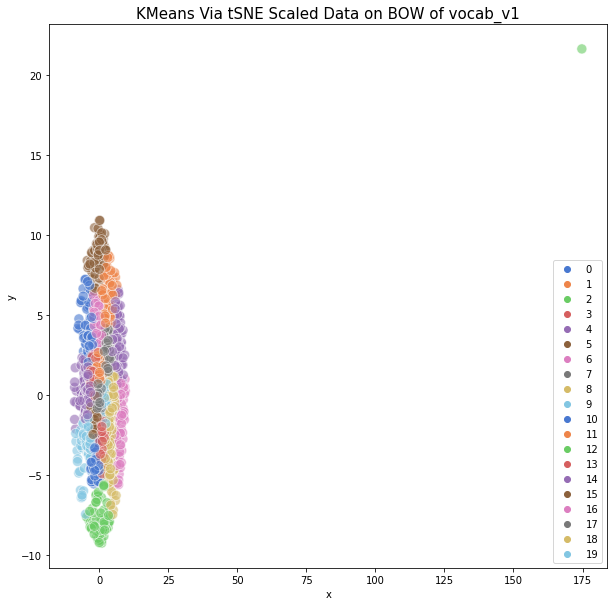

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

max_items = np.random.choice(range(BOW_all_data.shape[0]), size=6000, replace=False)

tsne_all_data = TSNE(n_components=2, n_iter=300, perplexity=100.0, early_exaggeration=15.0)
tsne_bow_all_data = tsne_all_data.fit_transform(BOW_all_data[max_items,:].todense())
tsne_bow_df_all_data = pd.DataFrame(data=tsne_bow_all_data, columns=["x", "y"])

kmeans_bow_tsne_all_data = KMeans(n_clusters=20, init='k-means++', max_iter=100, n_init=30) 
bow_tsne_all_data = kmeans_bow_tsne_all_data.fit(tsne_bow_df_all_data)
bow_all_data_tsne_labels=bow_tsne_all_data.labels_.tolist()


clusters_tsne_bow_all_data = pd.concat([tsne_bow_df_all_data, pd.DataFrame({'tsne_clusters':bow_all_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'KMeans Via tSNE Scaled Data on BOW of vocab_v1')

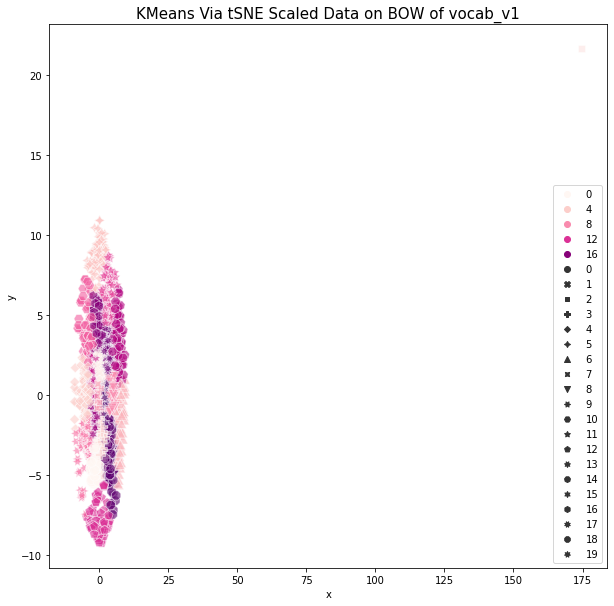

In [54]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_bow_all_data.iloc[:,0],clusters_tsne_bow_all_data.iloc[:,1],hue=bow_all_data_tsne_labels, style=bow_all_data_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on BOW of vocab_v1', fontsize=15)


K-Means clustering on BOW of vocab_v2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


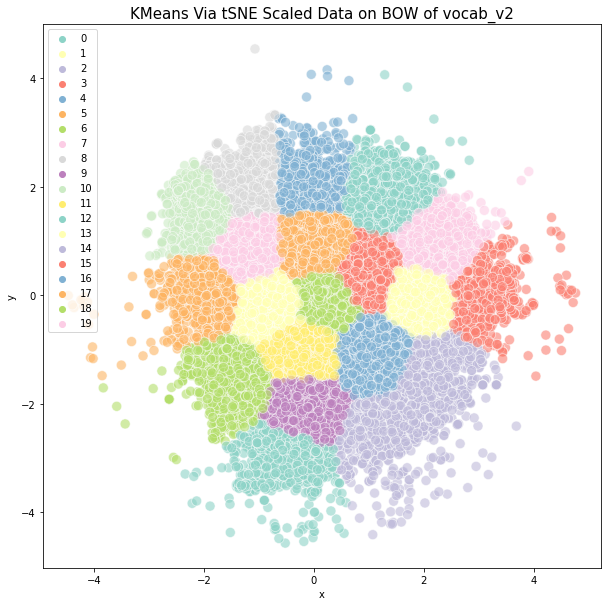

In [46]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

tsne_some_data = TSNE(n_components=2, n_iter=300, perplexity=100.0, early_exaggeration=15.0)
tsne_bow_some_data = tsne_some_data.fit_transform(BOW_some_data.todense())
tsne_bow_df_some_data = pd.DataFrame(data=tsne_bow_some_data, columns=["x", "y"])

kmeans_bow_tsne_some_data = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
bow_tsne_some_data = kmeans_bow_tsne_some_data.fit(tsne_bow_df_some_data)
bow_some_data_tsne_labels=bow_tsne_some_data.labels_.tolist()


clusters_tsne_bow_some_data = pd.concat([tsne_bow_df_some_data, pd.DataFrame({'tsne_clusters':bow_some_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))

plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'KMeans Via tSNE Scaled Data on BOW of vocab_v2')

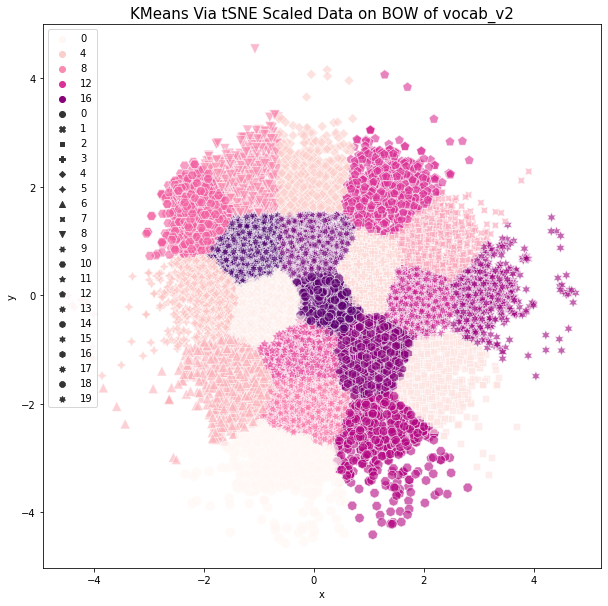

In [53]:
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_bow_some_data.iloc[:,0],clusters_tsne_bow_some_data.iloc[:,1],hue=bow_some_data_tsne_labels, style=bow_some_data_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on BOW of vocab_v2', fontsize=15)


ii) TF-IDF

In [47]:
#Creating TFIDF Model for vocab_v1
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary_v1_tfidf = TfidfVectorizer()
TFIDF_all_data = vocabulary_v1_tfidf.fit_transform(corpusWithSentences)

In [48]:
#Creating TFIDF Model for vocab_v2
from sklearn.feature_extraction.text import TfidfVectorizer
vocabulary_v2_tfidf = TfidfVectorizer(max_features=2000)
TFIDF_some_data = vocabulary_v2_tfidf.fit_transform(corpusWithSentences)

K-Means clustering on TF-IDF of vocab_v1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


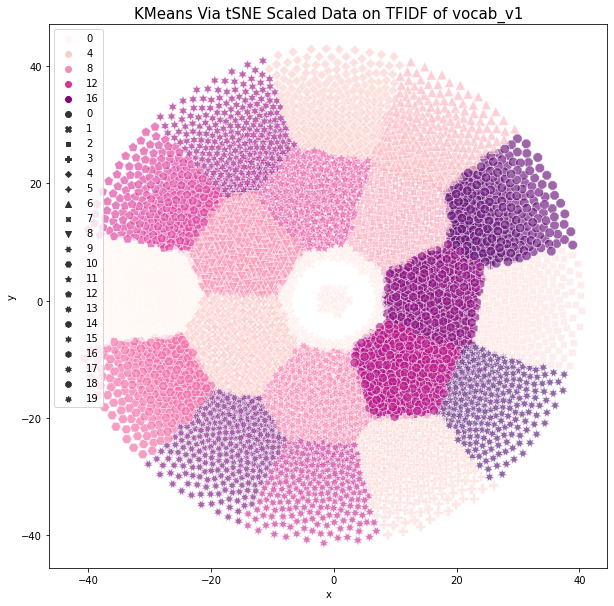

In [55]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

max_items = np.random.choice(range(TFIDF_all_data.shape[0]), size=6000, replace=False)

tsne_all_data_tfidf = TSNE(n_components=2, n_iter=300, perplexity=100.0, early_exaggeration=15.0)
tsne_tfidf_all_data = tsne_all_data_tfidf.fit_transform(TFIDF_all_data[max_items,:].todense())
tsne_tfidf_df_all_data = pd.DataFrame(data=tsne_tfidf_all_data, columns=["x", "y"])

kmeans_tfidf_tsne_all_data = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
tfidf_tsne_all_data = kmeans_tfidf_tsne_all_data.fit(tsne_tfidf_df_all_data)
tfidf_all_data_tsne_labels=tfidf_tsne_all_data.labels_.tolist()


clusters_tsne_tfidf_all_data = pd.concat([tsne_tfidf_df_all_data, pd.DataFrame({'tsne_clusters':tfidf_all_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_tfidf_all_data.iloc[:,0],clusters_tsne_tfidf_all_data.iloc[:,1],hue=tfidf_all_data_tsne_labels,style=tfidf_all_data_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on TFIDF of vocab_v1', fontsize=15)
# centroids=tfidf_tsne_all_data.cluster_centers_
# centroidpoint=tsne_all_data_tfidf.fit_transform(centroids)
# sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='*', s=100, c='#000000',label='centroids')
plt.legend()
plt.show()

K-Means clustering on TF-IDF of vocab_v2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:598: FutureWarning: np.matrix usage is deprecated in 1.0 and will raise a TypeError in 1.2. Please convert to a numpy array with np.asarray. For more information see: https://numpy.org/doc/stable/reference/generated/numpy.matrix.html
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


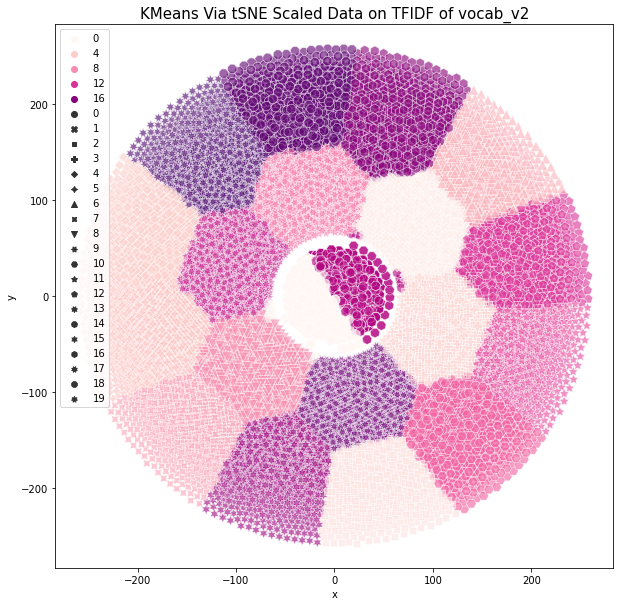

In [56]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

tsne_some_data_tfidf = TSNE(n_components=2, n_iter=3000, perplexity=100.0, early_exaggeration=15.0)
tsne_tfidf_some_data = tsne_some_data_tfidf.fit_transform(TFIDF_some_data.todense())
tsne_tfidf_df_some_data = pd.DataFrame(data=tsne_tfidf_some_data, columns=["x", "y"])

kmeans_tfidf_tsne_some_data = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
tfidf_tsne_some_data = kmeans_tfidf_tsne_some_data.fit(tsne_tfidf_df_some_data)
tfidf_some_data_tsne_labels=tfidf_tsne_some_data.labels_.tolist()


clusters_tsne_tfidf_some_data = pd.concat([tsne_tfidf_df_some_data, pd.DataFrame({'tsne_clusters':tfidf_some_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_tfidf_some_data.iloc[:,0],clusters_tsne_tfidf_some_data.iloc[:,1],hue=tfidf_some_data_tsne_labels,style=tfidf_some_data_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on TFIDF of vocab_v2', fontsize=15)

plt.legend()
plt.show()

iii) LDA

In [57]:
#Creating LDA Model for vocab_v1
import gensim as gm
from gensim.corpora import Dictionary
vocabulary_v1_ldamodel = gm.corpora.Dictionary(wholecorpus)
bow_all_data_ldamodel = [vocabulary_v1_ldamodel.doc2bow(text) for text in wholecorpus]
ldamodel_all_data = gensim.models.ldamodel.LdaModel(bow_all_data_ldamodel, id2word=vocabulary_v1_ldamodel, num_topics=20, passes=20, minimum_probability=0)
bow_all_data_ldamodel_array = np.array([[y for (x,y) in ldamodel_all_data[bow_all_data_ldamodel[i]]] for i in range(len(bow_all_data_ldamodel))])

In [58]:
#Creating LDA Model for vocab_v2
import gensim
import gensim.corpora as corpora
vocabulary_v2_ldamodel = corpora.Dictionary(wholecorpus)
vocabulary_v2_ldamodel.filter_extremes(keep_n=2000)
bow_some_data_ldamodel = [vocabulary_v2_ldamodel.doc2bow(text) for text in wholecorpus]
ldamodel_some_data = gensim.models.ldamodel.LdaModel(bow_some_data_ldamodel, id2word=vocabulary_v2_ldamodel, num_topics=20, passes=20, minimum_probability=0)
bow_some_data_ldamodel_array = np.array([[y for (x,y) in ldamodel_some_data[bow_some_data_ldamodel[i]]] for i in range(len(bow_some_data_ldamodel))])

K-Means clustering on LDA of vocab_v1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


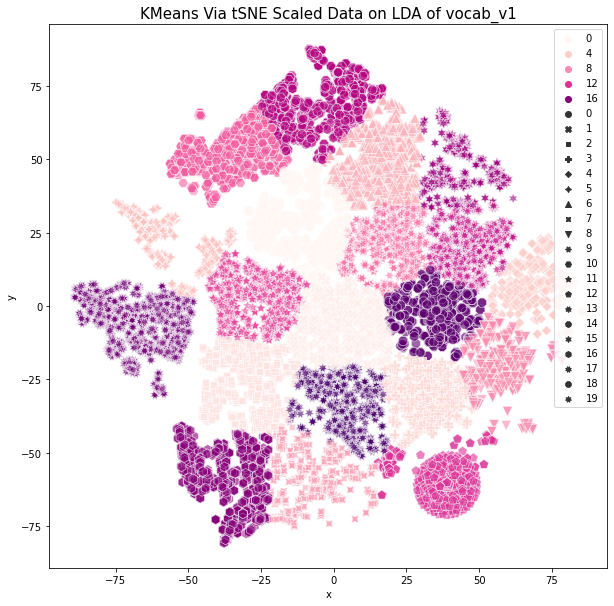

In [59]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

tsne_all_data_lda = TSNE(random_state=2017, perplexity=30, early_exaggeration=120)
tsne_lda_all_data = tsne_all_data_lda.fit_transform(bow_all_data_ldamodel_array)
tsne_lda_df_all_data = pd.DataFrame(tsne_lda_all_data, columns=['x','y'])


kmeans_lda_tsne_all_data = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
lda_tsne_all_data = kmeans_lda_tsne_all_data.fit(tsne_lda_df_all_data)
lda_all_data_tsne_labels=lda_tsne_all_data.labels_.tolist()

clusters_tsne_lda_all_data = pd.concat([tsne_lda_df_all_data, pd.DataFrame({'tsne_clusters':lda_all_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_lda_all_data.iloc[:,0],clusters_tsne_lda_all_data.iloc[:,1],hue=lda_all_data_tsne_labels,style=lda_all_data_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on LDA of vocab_v1', fontsize=15)
#centroids=doc2vec_tsne_alldata.cluster_centers_
#centroidpoint=tsne.fit_transform(centroids)
#sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='*', s=100, c='#000000',label='centroids')
plt.legend()
plt.show()

K-Means clustering on LDA of vocab_v2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


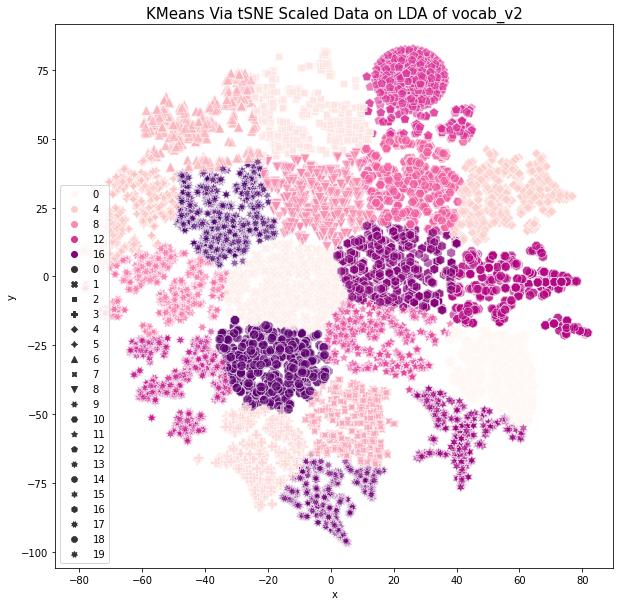

In [60]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

tsne_some_data_lda = TSNE(random_state=2017, perplexity=30, early_exaggeration=120)
tsne_lda_some_data = tsne_some_data_lda.fit_transform(bow_some_data_ldamodel_array)
tsne_lda_df_some_data = pd.DataFrame(tsne_lda_some_data, columns=['x','y'])


kmeans_lda_tsne_some_data = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
lda_tsne_some_data = kmeans_lda_tsne_some_data.fit(tsne_lda_df_some_data)
lda_some_data_tsne_labels=lda_tsne_some_data.labels_.tolist()

clusters_tsne_lda_some_data = pd.concat([tsne_lda_df_some_data, pd.DataFrame({'tsne_clusters':lda_some_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_lda_some_data.iloc[:,0],clusters_tsne_lda_some_data.iloc[:,1],hue=lda_some_data_tsne_labels, style=lda_some_data_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on LDA of vocab_v2', fontsize=15)
#centroids=doc2vec_tsne_alldata.cluster_centers_
#centroidpoint=tsne.fit_transform(centroids)
#sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='*', s=100, c='#000000',label='centroids')
plt.legend()
plt.show()

iv) Doc2vec

In [61]:
#Creating DOC2VEC Model for vocab_v1
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
doc2vec_vocab_v1 = [TaggedDocument(doc, [i]) for i, doc in enumerate(wholecorpus)]
doc2vec_model_all_data = Doc2Vec(window=5, min_count=1, workers=4)
doc2vec_model_all_data.build_vocab(doc2vec_vocab_v1)
doc2vec_model_all_data.train(doc2vec_vocab_v1, total_examples=len(doc2vec_vocab_v1), epochs=10)

In [62]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

#Creating DOC2VEC Model for vocab_v2
doc2vec_vocab_v2 = [TaggedDocument(doc, [i]) for i, doc in enumerate(wholecorpus)]
doc2vec_model_some_data = Doc2Vec(window=7, min_count=130, workers=4)
doc2vec_model_some_data.build_vocab(doc2vec_vocab_v2)
doc2vec_model_some_data.train(doc2vec_vocab_v2, total_examples=len(doc2vec_vocab_v2), epochs=50)

K-Means clustering on DOC2vec of vocab_v1

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


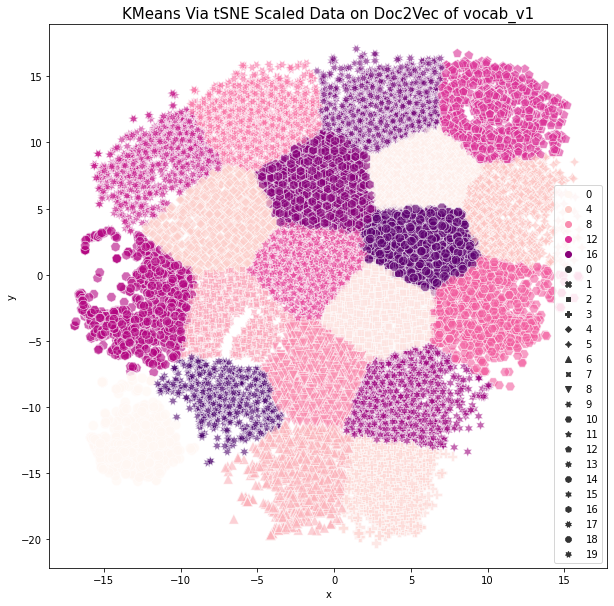

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
tsne_alldata = TSNE(n_components=2, n_iter=400, perplexity=200.0, early_exaggeration=20.0)
tsne_d2v_alldata = tsne_alldata.fit_transform(doc2vec_model_all_data.docvecs.vectors_docs)
tsne_d2v_df_alldata = pd.DataFrame(data=tsne_d2v_alldata, columns=["x", "y"])

kmeans_doc2vec_tsne_alldata = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
doc2vec_tsne_alldata = kmeans_doc2vec_tsne_alldata.fit(tsne_d2v_df_alldata)
doc2vec_all_tsne_labels=doc2vec_tsne_alldata.labels_.tolist()

clusters_tsne_doc2vec_alldata = pd.concat([tsne_d2v_df_alldata, pd.DataFrame({'tsne_clusters':doc2vec_all_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_doc2vec_alldata.iloc[:,0],clusters_tsne_doc2vec_alldata.iloc[:,1],hue=doc2vec_all_tsne_labels,style=doc2vec_all_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on Doc2Vec of vocab_v1', fontsize=15)
#centroids=doc2vec_tsne_alldata.cluster_centers_
#centroidpoint=tsne.fit_transform(centroids)
#sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='*', s=100, c='#000000',label='centroids')
plt.legend()
plt.show()

K-Means clustering on DOC2vec of vocab_v2

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


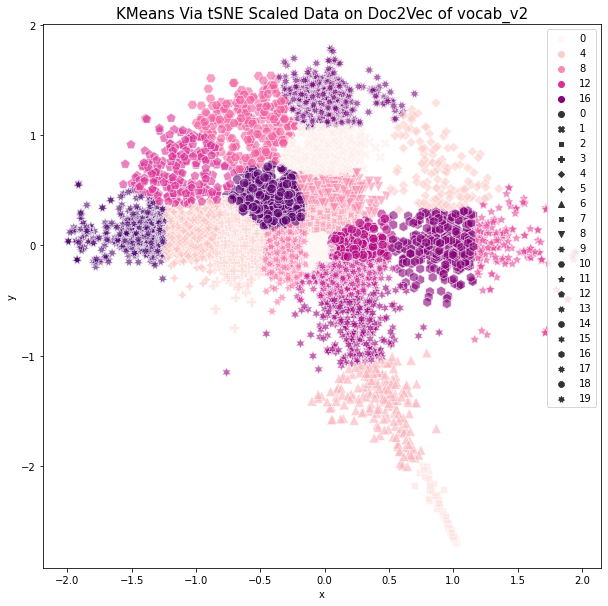

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.colors as mcolors
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
tsne_somedata = TSNE(n_components=2, n_iter=300, perplexity=100.0, early_exaggeration=15.0)
tsne_d2v_somedata = tsne_somedata.fit_transform(doc2vec_model_some_data.docvecs.vectors_docs)
tsne_d2v_df_somedata = pd.DataFrame(data=tsne_d2v_somedata, columns=["x", "y"])

kmeans_doc2vec_tsne_somedata = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
doc2vec_tsne_somedata = kmeans_doc2vec_tsne_somedata.fit(tsne_d2v_df_somedata)
doc2vec_some_tsne_labels=doc2vec_tsne_somedata.labels_.tolist()

import seaborn as sns
clusters_tsne_doc2vec_somedata = pd.concat([tsne_d2v_df_somedata, pd.DataFrame({'tsne_clusters':doc2vec_some_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_doc2vec_somedata.iloc[:,0],clusters_tsne_doc2vec_somedata.iloc[:,1],hue=doc2vec_some_tsne_labels,style=doc2vec_some_tsne_labels, palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on Doc2Vec of vocab_v2', fontsize=15)
#centroids=doc2vec_tsne_alldata.cluster_centers_
#centroidpoint=tsne.fit_transform(centroids)
#sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='*', s=100, c='#000000',label='centroids')
plt.legend()
plt.show()

NMI values for all the models on vocab_v1

In [65]:
from sklearn.cluster import KMeans
from sklearn import metrics
print("NMI values for all models on vocab_v1 - ")
#NMI of BOW model of all data vocabulary
kmeans_bow_tsne_all_data = KMeans(n_clusters=20,n_init=30,init='k-means++',max_iter=2000) 
bow_tsne_all_data = kmeans_bow_tsne_all_data.fit(BOW_all_data)
bow_all_data_tsne_labels=bow_tsne_all_data.labels_.tolist()
print("NMI OF BOW MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, bow_all_data_tsne_labels))


# #NMI of TFIDF model of all data vocabulary
kmeans_tfidf_tsne_all_data = KMeans(n_clusters=20,n_init=30,init='k-means++',max_iter=2000) 
tfidf_tsne_all_data = kmeans_tfidf_tsne_all_data.fit(TFIDF_all_data)
tfidf_all_data_tsne_labels=tfidf_tsne_all_data.labels_.tolist()
print("NMI OF TFIDF MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, tfidf_all_data_tsne_labels))


# #NMI of LDA model of all data vocabulary
kmeans_lda_tsne_all_data1 = KMeans(n_clusters=20,n_init=30,init='k-means++',max_iter=2000)  
lda_tsne_all_data1 = kmeans_lda_tsne_all_data1.fit(bow_all_data_ldamodel_array)
lda_all_tsne_labels1=lda_tsne_all_data1.labels_.tolist()
print("NMI OF LDA MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, lda_all_tsne_labels1))


#NMI of DOC2VEC model of all data vocabulary
kmeans_doc2vec_tsne_alldataa = KMeans(n_clusters=20,init='k-means++',max_iter=2000) 
doc2vec_tsne_alldataa = kmeans_doc2vec_tsne_alldata.fit(doc2vec_model_all_data.docvecs.vectors_docs)
doc2vec_all_tssne_labels=doc2vec_tsne_alldataa.labels_.tolist()
print("NMI OF DOC2VEC MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, doc2vec_all_tsne_labels))

NMI values for all models on vocab_v1 - 
NMI OF BOW MODEL: 0.019
NMI OF TFIDF MODEL: 0.258
NMI OF LDA MODEL: 0.303
NMI OF DOC2VEC MODEL: 0.246


NMI values for all the models on vocab_v2

In [66]:
from sklearn.cluster import KMeans
from sklearn import metrics
print("NMI values for all models on vocab_v2 - ")
#NMI of BOW model of some data vocabulary
kmeans_bow_tsne_some_data = KMeans(n_clusters=20,n_init=30,init='k-means++',max_iter=2000) 
bow_tsne_some_data = kmeans_bow_tsne_all_data.fit(BOW_some_data)
bow_some_data_tsne_labels=bow_tsne_some_data.labels_.tolist()
print("NMI OF BOW MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, bow_some_data_tsne_labels))


#NMI of TFIDF model of some data vocabulary
kmeans_tfidf_tsne_some_data = KMeans(n_clusters=20, init='k-means++', max_iter=2000) 
tfidf_tsne_some_data = kmeans_tfidf_tsne_some_data.fit(TFIDF_some_data)
tfidf_some_data_tsne_labels=tfidf_tsne_some_data.labels_.tolist()
print("NMI OF TFIDF MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, tfidf_some_data_tsne_labels))


#NMI of LDA model of some data vocabulary
kmeans_lda_tsne_some_data1 = KMeans(n_clusters=20, init='k-means++', max_iter=2000) 
lda_tsne_some_data1 = kmeans_lda_tsne_some_data1.fit(bow_some_data_ldamodel_array)
lda_some_tsne_labels1=lda_tsne_some_data1.labels_.tolist()
print("NMI OF LDA MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, lda_some_tsne_labels1))


#NMI of DOC2VEC model of some data vocabulary
kmeans_doc2vec_tsne_somedata = KMeans(n_clusters=20, init='k-means++', max_iter=2000) 
doc2vec_tsne_somedata = kmeans_doc2vec_tsne_somedata.fit(doc2vec_model_some_data.docvecs.vectors_docs)
doc2vec_some_tsne_labelss=doc2vec_tsne_somedata.labels_.tolist()
print("NMI OF DOC2VEC MODEL: %0.3f"% metrics.normalized_mutual_info_score(raw_dataset.target, doc2vec_some_tsne_labels))

NMI values for all models on vocab_v2 - 
NMI OF BOW MODEL: 0.021
NMI OF TFIDF MODEL: 0.252
NMI OF LDA MODEL: 0.265
NMI OF DOC2VEC MODEL: 0.060


A table with the size of 2 × 4 NMI values

A visualization result of the best clustering result indicated by NMI.

Max(NMI) = 0.353 -> obtained by LDA.

Visualization of best clustering by NMI

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


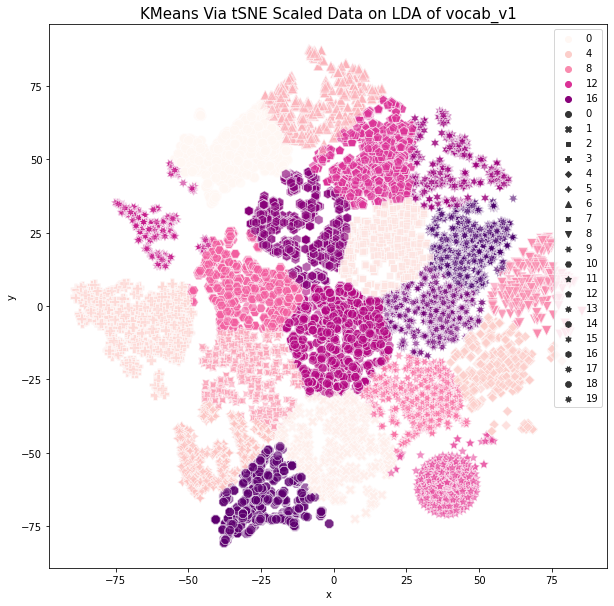

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import seaborn as sns

tsne_all_data_lda = TSNE(random_state=2017, perplexity=30, early_exaggeration=120)
tsne_lda_all_data = tsne_all_data_lda.fit_transform(bow_all_data_ldamodel_array)
tsne_lda_df_all_data = pd.DataFrame(tsne_lda_all_data, columns=['x','y'])


kmeans_lda_tsne_all_data = KMeans(n_clusters=20, init='k-means++', max_iter=100) 
lda_tsne_all_data = kmeans_lda_tsne_all_data.fit(tsne_lda_df_all_data)
lda_all_data_tsne_labels=lda_tsne_all_data.labels_.tolist()

clusters_tsne_lda_all_data = pd.concat([tsne_lda_df_all_data, pd.DataFrame({'tsne_clusters':lda_all_data_tsne_labels})], axis=1)
plt.figure(figsize = (10,10))
sns.scatterplot(clusters_tsne_lda_all_data.iloc[:,0],clusters_tsne_lda_all_data.iloc[:,1],hue=lda_all_data_tsne_labels, style=lda_all_data_tsne_labels,  palette='RdPu', s=100, alpha=0.6).set_title('KMeans Via tSNE Scaled Data on LDA of vocab_v1', fontsize=15)
#centroids=doc2vec_tsne_alldata.cluster_centers_
#centroidpoint=tsne.fit_transform(centroids)
#sns.scatterplot(centroidpoint[:, 0], centroidpoint[:, 1], marker='*', s=100, c='#000000',label='centroids')
plt.legend()
plt.show()

6.Do experiment analysis from one of the following aspects: 1) Impact of different preprocessing ways (e.g., compare the K-means or LDA visualizations between different vocabs); 2) Impact of different topic numbers; and 3) Impact of different clustering methods on the clustering result.

2) Impact of different topic numbers

In [68]:
import gensim
import gensim.corpora as corpora

import warnings
def fxn():
    warnings.warn("deprecated", DeprecationWarning)

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    fxn()

#Creating LDA Model for vocab_v1 with topics=5
vocabulary_all_data_ldamodel1 = corpora.Dictionary(wholecorpus)
bow_all_data_ldamodel1 = [vocabulary_all_data_ldamodel1.doc2bow(text) for text in wholecorpus]
ldamodel_all_data1 = gensim.models.ldamodel.LdaModel(bow_all_data_ldamodel1, id2word=vocabulary_all_data_ldamodel1, num_topics=5, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v1 with topics=10
vocabulary_all_data_ldamodel2 = corpora.Dictionary(wholecorpus)
bow_all_data_ldamodel2 = [vocabulary_all_data_ldamodel2.doc2bow(text) for text in wholecorpus]
ldamodel_all_data2 = gensim.models.ldamodel.LdaModel(bow_all_data_ldamodel2, id2word=vocabulary_all_data_ldamodel2, num_topics=10, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v1 with topics=15
vocabulary_all_data_ldamodel3 = corpora.Dictionary(wholecorpus)
bow_all_data_ldamodel3 = [vocabulary_all_data_ldamodel3.doc2bow(text) for text in wholecorpus]
ldamodel_all_data3 = gensim.models.ldamodel.LdaModel(bow_all_data_ldamodel3, id2word=vocabulary_all_data_ldamodel3, num_topics=15, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v1 with topics=20
vocabulary_all_data_ldamodel4 = corpora.Dictionary(wholecorpus)
bow_all_data_ldamodel4 = [vocabulary_all_data_ldamodel4.doc2bow(text) for text in wholecorpus]
ldamodel_all_data4 = gensim.models.ldamodel.LdaModel(bow_all_data_ldamodel4, id2word=vocabulary_all_data_ldamodel4, num_topics=20, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v1 with topics=25
vocabulary_all_data_ldamodel5 = corpora.Dictionary(wholecorpus)
bow_all_data_ldamodel5 = [vocabulary_all_data_ldamodel5.doc2bow(text) for text in wholecorpus]
ldamodel_all_data5 = gensim.models.ldamodel.LdaModel(bow_all_data_ldamodel5, id2word=vocabulary_all_data_ldamodel5, num_topics=25, passes=20, minimum_probability=0)

Similarity between different topics of the same model(ldamodel3) - vocab_v1

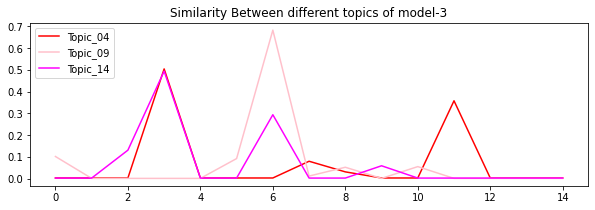


similarity between topics 04 and 09 of model3 -  0.012561852190055208
similarity between topics 09 and 14 of model3 -  0.4859624905469517
similarity between topics 04 and 14 of model3 -  0.6800386320451433


In [69]:
import pyLDAvis
import gensim
vec_lda_04 = vocabulary_all_data_ldamodel3.doc2bow(corpusWithSentences[4].split())
vec_lda_09 = vocabulary_all_data_ldamodel3.doc2bow(corpusWithSentences[9].split())
vec_lda_14 = vocabulary_all_data_ldamodel3.doc2bow(corpusWithSentences[14].split())
vec_lda_topics_04 = ldamodel_all_data3[vec_lda_04]
vec_lda_topics_09 = ldamodel_all_data3[vec_lda_09]
vec_lda_topics_14 = ldamodel_all_data3[vec_lda_14]

import pandas as pd
df1 = pd.DataFrame(vec_lda_topics_04, columns=['topic', 'contrib'])
df1['doc'] = 'doc_04'
df2 = pd.DataFrame(vec_lda_topics_09, columns=['topic', 'contrib'])
df2['doc'] = 'doc_19'
df3 = pd.DataFrame(vec_lda_topics_14, columns=['topic', 'contrib'])
df3['doc'] = 'doc_14'

import matplotlib.pyplot as plt
plt.figure(figsize=[10,3])
plt.plot(df1.topic, df1.contrib,color='red')
plt.plot(df2.topic, df2.contrib,color='pink')
plt.plot(df3.topic, df3.contrib,color='magenta')
plt.legend(['Topic_04', 'Topic_09', 'Topic_14'], loc='upper left')
plt.title("Similarity Between different topics of model-3")
plt.show()
simmilarity_04_09 = gensim.matutils.cossim(vec_lda_topics_04, vec_lda_topics_09)
simmilarity_09_14 = gensim.matutils.cossim(vec_lda_topics_09, vec_lda_topics_14)
simmilarity_04_14 = gensim.matutils.cossim(vec_lda_topics_04, vec_lda_topics_14)

print('\n'+'similarity between topics 04 and 09 of model3 - ', simmilarity_04_09)
print('similarity between topics 09 and 14 of model3 - ', simmilarity_09_14)
print('similarity between topics 04 and 14 of model3 - ', simmilarity_04_14)

Similarity between the same topic(topic 8) of all the models - vocab_v1

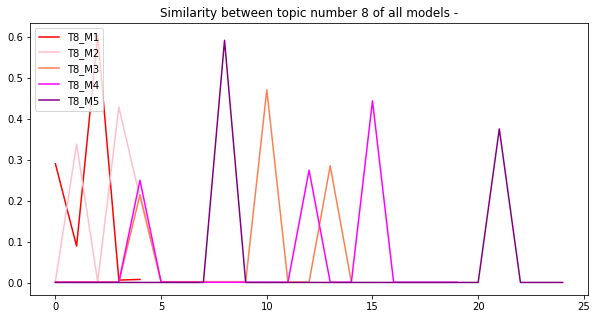

Similarities between topic number 8 -
model1 and model2 -  0.09751433199797885
model1 and model3 -  0.010638821105803383
model1 and model4 -  0.010139713122383995
model1 and model5 -  0.0030158187644424685
model2 and model3 -  0.13481529356450347
model2 and model4 -  0.15779192538678394
model2 and model5 -  0.008635117670954961
model3 and model4 -  0.16325196725492472
model5 and model5 -  0.006840493436481131
model4 and model5 -  0.006114046425638334


In [72]:
import pyLDAvis
import gensim
vec_lda_8_1 = vocabulary_all_data_ldamodel1.doc2bow(corpusWithSentences[8].split())
vec_lda_8_2 = vocabulary_all_data_ldamodel2.doc2bow(corpusWithSentences[8].split())
vec_lda_8_3 = vocabulary_all_data_ldamodel3.doc2bow(corpusWithSentences[8].split())
vec_lda_8_4 = vocabulary_all_data_ldamodel4.doc2bow(corpusWithSentences[8].split())
vec_lda_8_5 = vocabulary_all_data_ldamodel5.doc2bow(corpusWithSentences[8].split())

vec_lda_topics_8_1 = ldamodel_all_data1[vec_lda_8_1]
vec_lda_topics_8_2 = ldamodel_all_data2[vec_lda_8_2]
vec_lda_topics_8_3 = ldamodel_all_data3[vec_lda_8_3]
vec_lda_topics_8_4 = ldamodel_all_data4[vec_lda_8_4]
vec_lda_topics_8_5 = ldamodel_all_data5[vec_lda_8_5]

import pandas as pd
df1_1 = pd.DataFrame(vec_lda_topics_8_1, columns=['topic', 'contrib'])
df1_1['doc'] = 'T8_M1'
df2_2 = pd.DataFrame(vec_lda_topics_8_2, columns=['topic', 'contrib'])
df2_2['doc'] = 'T8_M2'
df3_3 = pd.DataFrame(vec_lda_topics_8_3, columns=['topic', 'contrib'])
df3_3['doc'] = 'T8_M3'
df4_4 = pd.DataFrame(vec_lda_topics_8_4, columns=['topic', 'contrib'])
df4_4['doc'] = 'T8_M4'
df5_5 = pd.DataFrame(vec_lda_topics_8_5, columns=['topic', 'contrib'])
df5_5['doc'] = 'T8_M5'

import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])
plt.plot(df1_1.topic, df1_1.contrib, color='red')
plt.plot(df2_2.topic, df2_2.contrib, color='pink')
plt.plot(df3_3.topic, df3_3.contrib, color='coral')
plt.plot(df4_4.topic, df4_4.contrib, color='magenta')
plt.plot(df5_5.topic, df5_5.contrib, color='purple')
plt.legend(['T8_M1', 'T8_M2', 'T8_M3','T8_M4','T8_M5'], loc='upper left')
plt.title("Similarity between topic number 8 of all models -")
plt.show()

similarity_08_1_08_2 = gensim.matutils.cossim(vec_lda_topics_8_1, vec_lda_topics_8_2)
similarity_08_1_08_3 = gensim.matutils.cossim(vec_lda_topics_8_1, vec_lda_topics_8_3)
similarity_08_1_08_4 = gensim.matutils.cossim(vec_lda_topics_8_1, vec_lda_topics_8_4)
similarity_08_1_08_5 = gensim.matutils.cossim(vec_lda_topics_8_1, vec_lda_topics_8_5)

similarity_08_2_08_3 = gensim.matutils.cossim(vec_lda_topics_8_2, vec_lda_topics_8_3)
similarity_08_2_08_4 = gensim.matutils.cossim(vec_lda_topics_8_2, vec_lda_topics_8_4)
similarity_08_2_08_5 = gensim.matutils.cossim(vec_lda_topics_8_2, vec_lda_topics_8_5)

similarity_08_3_08_4 = gensim.matutils.cossim(vec_lda_topics_8_3, vec_lda_topics_8_4)
similarity_08_3_08_5 = gensim.matutils.cossim(vec_lda_topics_8_3, vec_lda_topics_8_5)

similarity_08_4_08_5 = gensim.matutils.cossim(vec_lda_topics_8_4, vec_lda_topics_8_5)

print("Similarities between topic number 8 -")
print('model1 and model2 - ', similarity_08_1_08_2)
print('model1 and model3 - ', similarity_08_1_08_3)
print('model1 and model4 - ', similarity_08_1_08_4)
print('model1 and model5 - ', similarity_08_1_08_5)
print('model2 and model3 - ', similarity_08_2_08_3)
print('model2 and model4 - ', similarity_08_2_08_4)
print('model2 and model5 - ', similarity_08_2_08_5)
print('model3 and model4 - ', similarity_08_3_08_4)
print('model5 and model5 - ', similarity_08_3_08_5)
print('model4 and model5 - ', similarity_08_4_08_5)

In [73]:
import gensim
import gensim.corpora as corpora
#Creating LDA Model for vocab_v2 with topics=5
vocabulary_some_data_ldamodel1 = corpora.Dictionary(wholecorpus)
vocabulary_some_data_ldamodel1.filter_extremes(keep_n=2000)
bow_some_data_ldamodel1 = [vocabulary_some_data_ldamodel1.doc2bow(text) for text in wholecorpus]
ldamodel_some_data1 = gensim.models.ldamodel.LdaModel(bow_some_data_ldamodel1, id2word=vocabulary_some_data_ldamodel1, num_topics=5, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v2 with topics=10
vocabulary_some_data_ldamodel2 = corpora.Dictionary(wholecorpus)
vocabulary_some_data_ldamodel2.filter_extremes(keep_n=2000)
bow_some_data_ldamodel2 = [vocabulary_some_data_ldamodel2.doc2bow(text) for text in wholecorpus]
ldamodel_some_data2 = gensim.models.ldamodel.LdaModel(bow_some_data_ldamodel2, id2word=vocabulary_some_data_ldamodel2, num_topics=10, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v2 with topics=15
vocabulary_some_data_ldamodel3 = corpora.Dictionary(wholecorpus)
vocabulary_some_data_ldamodel3.filter_extremes(keep_n=2000)
bow_some_data_ldamodel3 = [vocabulary_some_data_ldamodel3.doc2bow(text) for text in wholecorpus]
ldamodel_some_data3 = gensim.models.ldamodel.LdaModel(bow_some_data_ldamodel3, id2word=vocabulary_some_data_ldamodel3, num_topics=15, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v2 with topics=20
vocabulary_some_data_ldamodel4 = corpora.Dictionary(wholecorpus)
vocabulary_some_data_ldamodel4.filter_extremes(keep_n=2000)
bow_some_data_ldamodel4 = [vocabulary_some_data_ldamodel4.doc2bow(text) for text in wholecorpus]
ldamodel_some_data4 = gensim.models.ldamodel.LdaModel(bow_some_data_ldamodel4, id2word=vocabulary_some_data_ldamodel4, num_topics=20, passes=20, minimum_probability=0)

#Creating LDA Model for vocab_v2 with topics=25
vocabulary_some_data_ldamodel5 = corpora.Dictionary(wholecorpus)
vocabulary_some_data_ldamodel5.filter_extremes(keep_n=2000)
bow_some_data_ldamodel5 = [vocabulary_some_data_ldamodel5.doc2bow(text) for text in wholecorpus]
ldamodel_some_data5 = gensim.models.ldamodel.LdaModel(bow_some_data_ldamodel5, id2word=vocabulary_some_data_ldamodel5, num_topics=25, passes=20, minimum_probability=0)

Similarity between different topics of the same model(ldamodel3) - vocab_v2

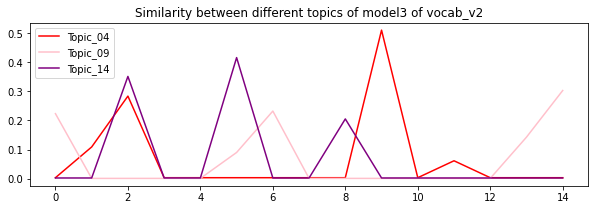


similarity between topics 04 and 09 of model3 -  0.01398119885369888
similarity between topics 09 and 14 of model3 -  0.1447978035212143
similarity between topics 04 and 14 of model3 -  0.29690593829357503


In [74]:
import pyLDAvis 
import gensim
vec_lda_04s = vocabulary_some_data_ldamodel3.doc2bow(corpusWithSentences[4].split())
vec_lda_09s = vocabulary_some_data_ldamodel3.doc2bow(corpusWithSentences[9].split())
vec_lda_14s = vocabulary_some_data_ldamodel3.doc2bow(corpusWithSentences[14].split())
vec_lda_topics_04s = ldamodel_some_data3[vec_lda_04s]
vec_lda_topics_09s = ldamodel_some_data3[vec_lda_09s]
vec_lda_topics_14s = ldamodel_some_data3[vec_lda_14s]

import pandas as pd
df1s = pd.DataFrame(vec_lda_topics_04s, columns=['topic', 'contrib'])
df1s['doc'] = 'doc_04'
df2s = pd.DataFrame(vec_lda_topics_09s, columns=['topic', 'contrib'])
df2s['doc'] = 'doc_09'
df3s = pd.DataFrame(vec_lda_topics_14s, columns=['topic', 'contrib'])
df3s['doc'] = 'doc_14'

import matplotlib.pyplot as plt
plt.figure(figsize=[10,3])
plt.plot(df1s.topic, df1s.contrib, color='red')
plt.plot(df2s.topic, df2s.contrib, color='pink')
plt.plot(df3s.topic, df3s.contrib, color='purple')
plt.legend(['Topic_04', 'Topic_09', 'Topic_14'], loc='upper left')
plt.title("Similarity between different topics of model3 of vocab_v2")
plt.show()

similarity_04_09s = gensim.matutils.cossim(vec_lda_topics_04s, vec_lda_topics_09s)
similarity_09_14s = gensim.matutils.cossim(vec_lda_topics_09s, vec_lda_topics_14s)
similarity_04_14s = gensim.matutils.cossim(vec_lda_topics_04s, vec_lda_topics_14s)

print('\n'+'similarity between topics 04 and 09 of model3 - ', similarity_04_09s)
print('similarity between topics 09 and 14 of model3 - ', similarity_09_14s)
print('similarity between topics 04 and 14 of model3 - ', similarity_04_14s)

Similarity between the same topic(topic 8) of all the models - vocab_v2

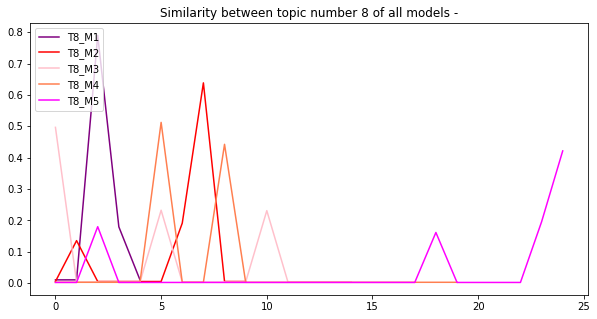

Similarities between topic number 8 -
model1 and model2 -  0.01150473263179424
model1 and model3 -  0.017382138746765616
model1 and model4 -  0.004555978101587246
model1 and model5 -  0.33577579661730145
model2 and model3 -  0.017157882871103182
model2 and model4 -  0.015740107708363378
model2 and model5 -  0.008110690916159942
model3 and model4 -  0.30385469459027203
model5 and model5 -  0.008319478568864258
model4 and model5 -  0.008016677195481943


In [75]:
import pyLDAvis
import gensim
vec_lda_8_1s = vocabulary_some_data_ldamodel1.doc2bow(corpusWithSentences[8].split())
vec_lda_8_2s = vocabulary_some_data_ldamodel2.doc2bow(corpusWithSentences[8].split())
vec_lda_8_3s = vocabulary_some_data_ldamodel3.doc2bow(corpusWithSentences[8].split())
vec_lda_8_4s = vocabulary_some_data_ldamodel4.doc2bow(corpusWithSentences[8].split())
vec_lda_8_5s = vocabulary_some_data_ldamodel5.doc2bow(corpusWithSentences[8].split())

vec_lda_topics_8_1s = ldamodel_some_data1[vec_lda_8_1s]
vec_lda_topics_8_2s = ldamodel_some_data2[vec_lda_8_2s]
vec_lda_topics_8_3s = ldamodel_some_data3[vec_lda_8_3s]
vec_lda_topics_8_4s = ldamodel_some_data4[vec_lda_8_4s]
vec_lda_topics_8_5s = ldamodel_some_data5[vec_lda_8_5s]

import pandas as pd
df1_1s = pd.DataFrame(vec_lda_topics_8_1s, columns=['topic', 'contrib'])
df1_1s['doc'] = 'T8_M1'
df2_2s = pd.DataFrame(vec_lda_topics_8_2s, columns=['topic', 'contrib'])
df2_2s['doc'] = 'T8_M2'
df3_3s = pd.DataFrame(vec_lda_topics_8_3s, columns=['topic', 'contrib'])
df3_3s['doc'] = 'T8_M3'
df4_4s = pd.DataFrame(vec_lda_topics_8_4s, columns=['topic', 'contrib'])
df4_4s['doc'] = 'T8_M4'
df5_5s = pd.DataFrame(vec_lda_topics_8_5s, columns=['topic', 'contrib'])
df5_5s['doc'] = 'T8_M5'

import matplotlib.pyplot as plt

plt.figure(figsize=[10,5])
plt.plot(df1_1s.topic, df1_1s.contrib, color='purple')
plt.plot(df2_2s.topic, df2_2s.contrib, color='red')
plt.plot(df3_3s.topic, df3_3s.contrib, color='pink')
plt.plot(df4_4s.topic, df4_4s.contrib, color='coral')
plt.plot(df5_5s.topic, df5_5s.contrib, color='magenta')
plt.legend(['T8_M1', 'T8_M2', 'T8_M3','T8_M4','T8_M5'], loc='upper left')
plt.title("Similarity between topic number 8 of all models -")
plt.show()

simmilarity_08_1_08_2s = gensim.matutils.cossim(vec_lda_topics_8_1s, vec_lda_topics_8_2s)
simmilarity_08_1_08_3s = gensim.matutils.cossim(vec_lda_topics_8_1s, vec_lda_topics_8_3s)
simmilarity_08_1_08_4s = gensim.matutils.cossim(vec_lda_topics_8_1s, vec_lda_topics_8_4s)
simmilarity_08_1_08_5s = gensim.matutils.cossim(vec_lda_topics_8_1s, vec_lda_topics_8_5s)

simmilarity_08_2_08_3s = gensim.matutils.cossim(vec_lda_topics_8_2s, vec_lda_topics_8_3s)
simmilarity_08_2_08_4s = gensim.matutils.cossim(vec_lda_topics_8_2s, vec_lda_topics_8_4s)
simmilarity_08_2_08_5s = gensim.matutils.cossim(vec_lda_topics_8_2s, vec_lda_topics_8_5s)

simmilarity_08_3_08_4s = gensim.matutils.cossim(vec_lda_topics_8_3s, vec_lda_topics_8_4s)
simmilarity_08_3_08_5s = gensim.matutils.cossim(vec_lda_topics_8_3s, vec_lda_topics_8_5s)

simmilarity_08_4_08_5s = gensim.matutils.cossim(vec_lda_topics_8_4s, vec_lda_topics_8_5s)

print("Similarities between topic number 8 -")
print('model1 and model2 - ', simmilarity_08_1_08_2s)
print('model1 and model3 - ', simmilarity_08_1_08_3s)
print('model1 and model4 - ', simmilarity_08_1_08_4s)
print('model1 and model5 - ', simmilarity_08_1_08_5s)
print('model2 and model3 - ', simmilarity_08_2_08_3s)
print('model2 and model4 - ', simmilarity_08_2_08_4s)
print('model2 and model5 - ', simmilarity_08_2_08_5s)
print('model3 and model4 - ', simmilarity_08_3_08_4s)
print('model5 and model5 - ', simmilarity_08_3_08_5s)
print('model4 and model5 - ', simmilarity_08_4_08_5s)

3) Impact of different clustering methods on the clustering result - by considering Homeogenity, Completeness, V-measure, Silhouette Coefficient metrics

In [76]:
from sklearn import metrics
#BOW on vocab_v1
print("BOW of vocab_v1 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, bow_all_data_tsne_labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, bow_all_data_tsne_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, bow_all_data_tsne_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(BOW_all_data, bow_all_data_tsne_labels, sample_size=1000) +"\n")

#BOW on vocab_v2
print("BOW of vocab_v2 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, bow_some_data_tsne_labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, bow_some_data_tsne_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, bow_some_data_tsne_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(BOW_some_data, bow_some_data_tsne_labels, sample_size=1000) + "\n")

#TFIDF on vocab_v1
print("TFIDF of vocab_v1 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, tfidf_all_data_tsne_labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, tfidf_all_data_tsne_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, tfidf_all_data_tsne_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(TFIDF_all_data, tfidf_all_data_tsne_labels, sample_size=1000) + "\n")

#TFIDF on vocab_v2
print("TFIDF of vocab_v2 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, tfidf_some_data_tsne_labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, tfidf_some_data_tsne_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, tfidf_some_data_tsne_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(TFIDF_some_data, tfidf_some_data_tsne_labels, sample_size=1000) + "\n")

#LDA on vocab_v1
print("LDA of vocab_v1 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, lda_all_tsne_labels1))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, lda_all_tsne_labels1))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, lda_all_tsne_labels1))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(bow_all_data_ldamodel_array, lda_all_tsne_labels1, sample_size=1000) + "\n")

#LDA on vocab_v2
print("LDA of vocab_v2 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, lda_some_tsne_labels1))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, lda_some_tsne_labels1))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, lda_some_tsne_labels1))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(bow_some_data_ldamodel_array, lda_some_tsne_labels1, sample_size=1000)+ "\n")

#Doc2Vec on vocab_v1
print("Doc2Vec of vocab_v1 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, doc2vec_all_tsne_labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, doc2vec_all_tsne_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, doc2vec_all_tsne_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(doc2vec_model_all_data.docvecs.vectors_docs, doc2vec_all_tsne_labels, sample_size=1000)+ "\n")

#Doc2Vec on vocab_v2
print("Doc2Vec of vocab_v2 -")
print("Homogeneity: %0.3f" % metrics.homogeneity_score(dataset.target, doc2vec_some_tsne_labels))
print("Completeness: %0.3f" % metrics.completeness_score(dataset.target, doc2vec_some_tsne_labels))
print("V-measure: %0.3f" % metrics.v_measure_score(dataset.target, doc2vec_some_tsne_labels))
print("Silhouette Coefficient: %0.3f"% metrics.silhouette_score(doc2vec_model_some_data.docvecs.vectors_docs, doc2vec_some_tsne_labels, sample_size=1000))

BOW of vocab_v1 -
Homogeneity: 0.010
Completeness: 0.124
V-measure: 0.019
Silhouette Coefficient: 0.621

BOW of vocab_v2 -
Homogeneity: 0.012
Completeness: 0.071
V-measure: 0.021
Silhouette Coefficient: 0.422

TFIDF of vocab_v1 -
Homogeneity: 0.234
Completeness: 0.287
V-measure: 0.258
Silhouette Coefficient: 0.007

TFIDF of vocab_v2 -
Homogeneity: 0.234
Completeness: 0.274
V-measure: 0.252
Silhouette Coefficient: 0.010

LDA of vocab_v1 -
Homogeneity: 0.298
Completeness: 0.308
V-measure: 0.303
Silhouette Coefficient: 0.241

LDA of vocab_v2 -
Homogeneity: 0.262
Completeness: 0.269
V-measure: 0.265
Silhouette Coefficient: 0.223

Doc2Vec of vocab_v1 -
Homogeneity: 0.246
Completeness: 0.247
V-measure: 0.246
Silhouette Coefficient: -0.149

Doc2Vec of vocab_v2 -
Homogeneity: 0.057
Completeness: 0.064
V-measure: 0.060
Silhouette Coefficient: -0.250


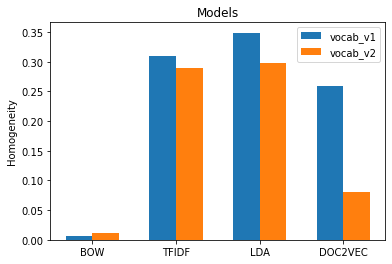

In [77]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['BOW', 'TFIDF', 'LDA', 'DOC2VEC']
All_data = [0.007,0.309,0.349,0.260]
Some_data = [0.011,0.289,0.298,0.081]
x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, All_data, width, label='vocab_v1')
rects2 = ax.bar(x + width/2, Some_data, width, label='vocab_v2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Homogeneity')
ax.set_title('Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

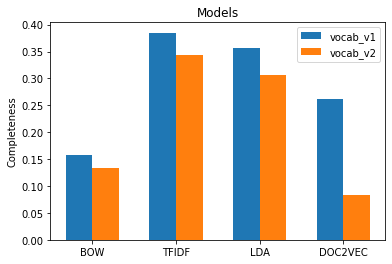

In [78]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['BOW', 'TFIDF', 'LDA', 'DOC2VEC']
All_data = [0.158,0.385,0.357,0.261]
Some_data = [0.134,0.344,0.306,0.083]
x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, All_data, width, label='vocab_v1')
rects2 = ax.bar(x + width/2, Some_data, width, label='vocab_v2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Completeness')
ax.set_title('Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

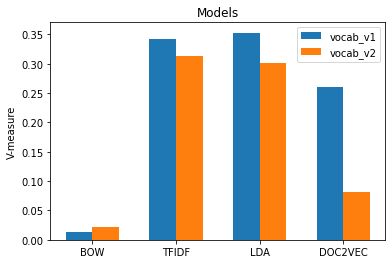

In [79]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['BOW', 'TFIDF', 'LDA', 'DOC2VEC']
All_data = [0.013,0.343,0.353,0.261]
Some_data = [0.021,0.314,0.302,0.082]
x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, All_data, width, label='vocab_v1')
rects2 = ax.bar(x + width/2, Some_data, width, label='vocab_v2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('V-measure')
ax.set_title('Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

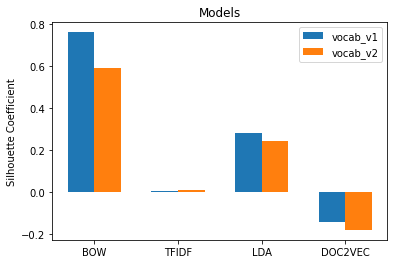

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

labels = ['BOW', 'TFIDF', 'LDA', 'DOC2VEC']
All_data = [0.762,0.007,0.279,-0.145]
Some_data = [0.592,0.010,0.242,-0.181]
x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

x = np.arange(len(labels))  # the label locations
width = 0.32  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, All_data, width, label='vocab_v1')
rects2 = ax.bar(x + width/2, Some_data, width, label='vocab_v2')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Silhouette Coefficient')
ax.set_title('Models')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

7.Propose one supervised task on your own. Give the motivation, methodology, and experimental results, accordingly. For example, you could propose a classification task upon the doc. representations we learned so far and develop one classification model (e.g., Softmax regression, SVMs, KNNs, etc) to compare different representations.

In [97]:
# import the required module from scikit learn
from sklearn.naive_bayes import MultinomialNB

# Implementing classification model- using MultinomialNB

X_train_mnb = newsgroups_train.data
X_test_mnb = newsgroups_test.data
y_train_mnb = newsgroups_train.target
y_test_mnb = newsgroups_test.target

# Instantiate the estimator
clf_MNB = MultinomialNB(alpha=.01)

text_clf = Pipeline([('vect', CountVectorizer()),
                     ('tfidf', TfidfTransformer()),
                     ('clf_MNB', clf_MNB),
                     ])
   

# Fit the model with data (aka "model training")
text_clf.fit(X_train_mnb, y_train_mnb)

# Predict the response for a new observation
y_pred = text_clf.predict(X_test_mnb)
print("Predicted Class Labels:",y_pred) 

print(accuracy_score(y_test_mnb, y_pred))

Predicted Class Labels: [ 7 11  0 ...  9  3 15]
0.8352363250132767


In [83]:
# first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test_mnb, y_pred))

[[249   0   0   4   0   1   0   0   1   1   0   1   0   5   5  28   3   3
    1  17]
 [  0 290  15  14  10  23   6   0   0   3   0   4  12   0   7   2   0   2
    0   1]
 [  1  32 248  52   4  20   5   0   2   1   1   6   3   3   5   4   0   0
    4   3]
 [  0  11  26 293  22   1  11   1   0   1   0   1  21   0   4   0   0   0
    0   0]
 [  0   7  10  14 322   1   8   4   1   2   1   2   9   2   1   0   1   0
    0   0]
 [  0  40  14  11   6 307   3   1   2   0   0   3   2   1   4   0   1   0
    0   0]
 [  0   4   6  26   8   0 306  11   9   1   5   0   9   4   1   0   0   0
    0   0]
 [  0   1   1   5   1   0  10 358   6   1   0   0   6   3   1   0   2   0
    1   0]
 [  0   1   0   1   1   0   2   7 383   0   0   0   3   0   0   0   0   0
    0   0]
 [  0   0   0   0   1   0   3   4   0 373  11   1   0   0   2   0   0   2
    0   0]
 [  0   0   0   0   0   1   1   0   0   4 387   2   0   1   0   2   1   0
    0   0]
 [  1   3   1   2   2   1   3   3   0   0   0 370   1   3   2   0

In [84]:
cfmatrix_mnb = metrics.confusion_matrix(y_test_mnb, y_pred)

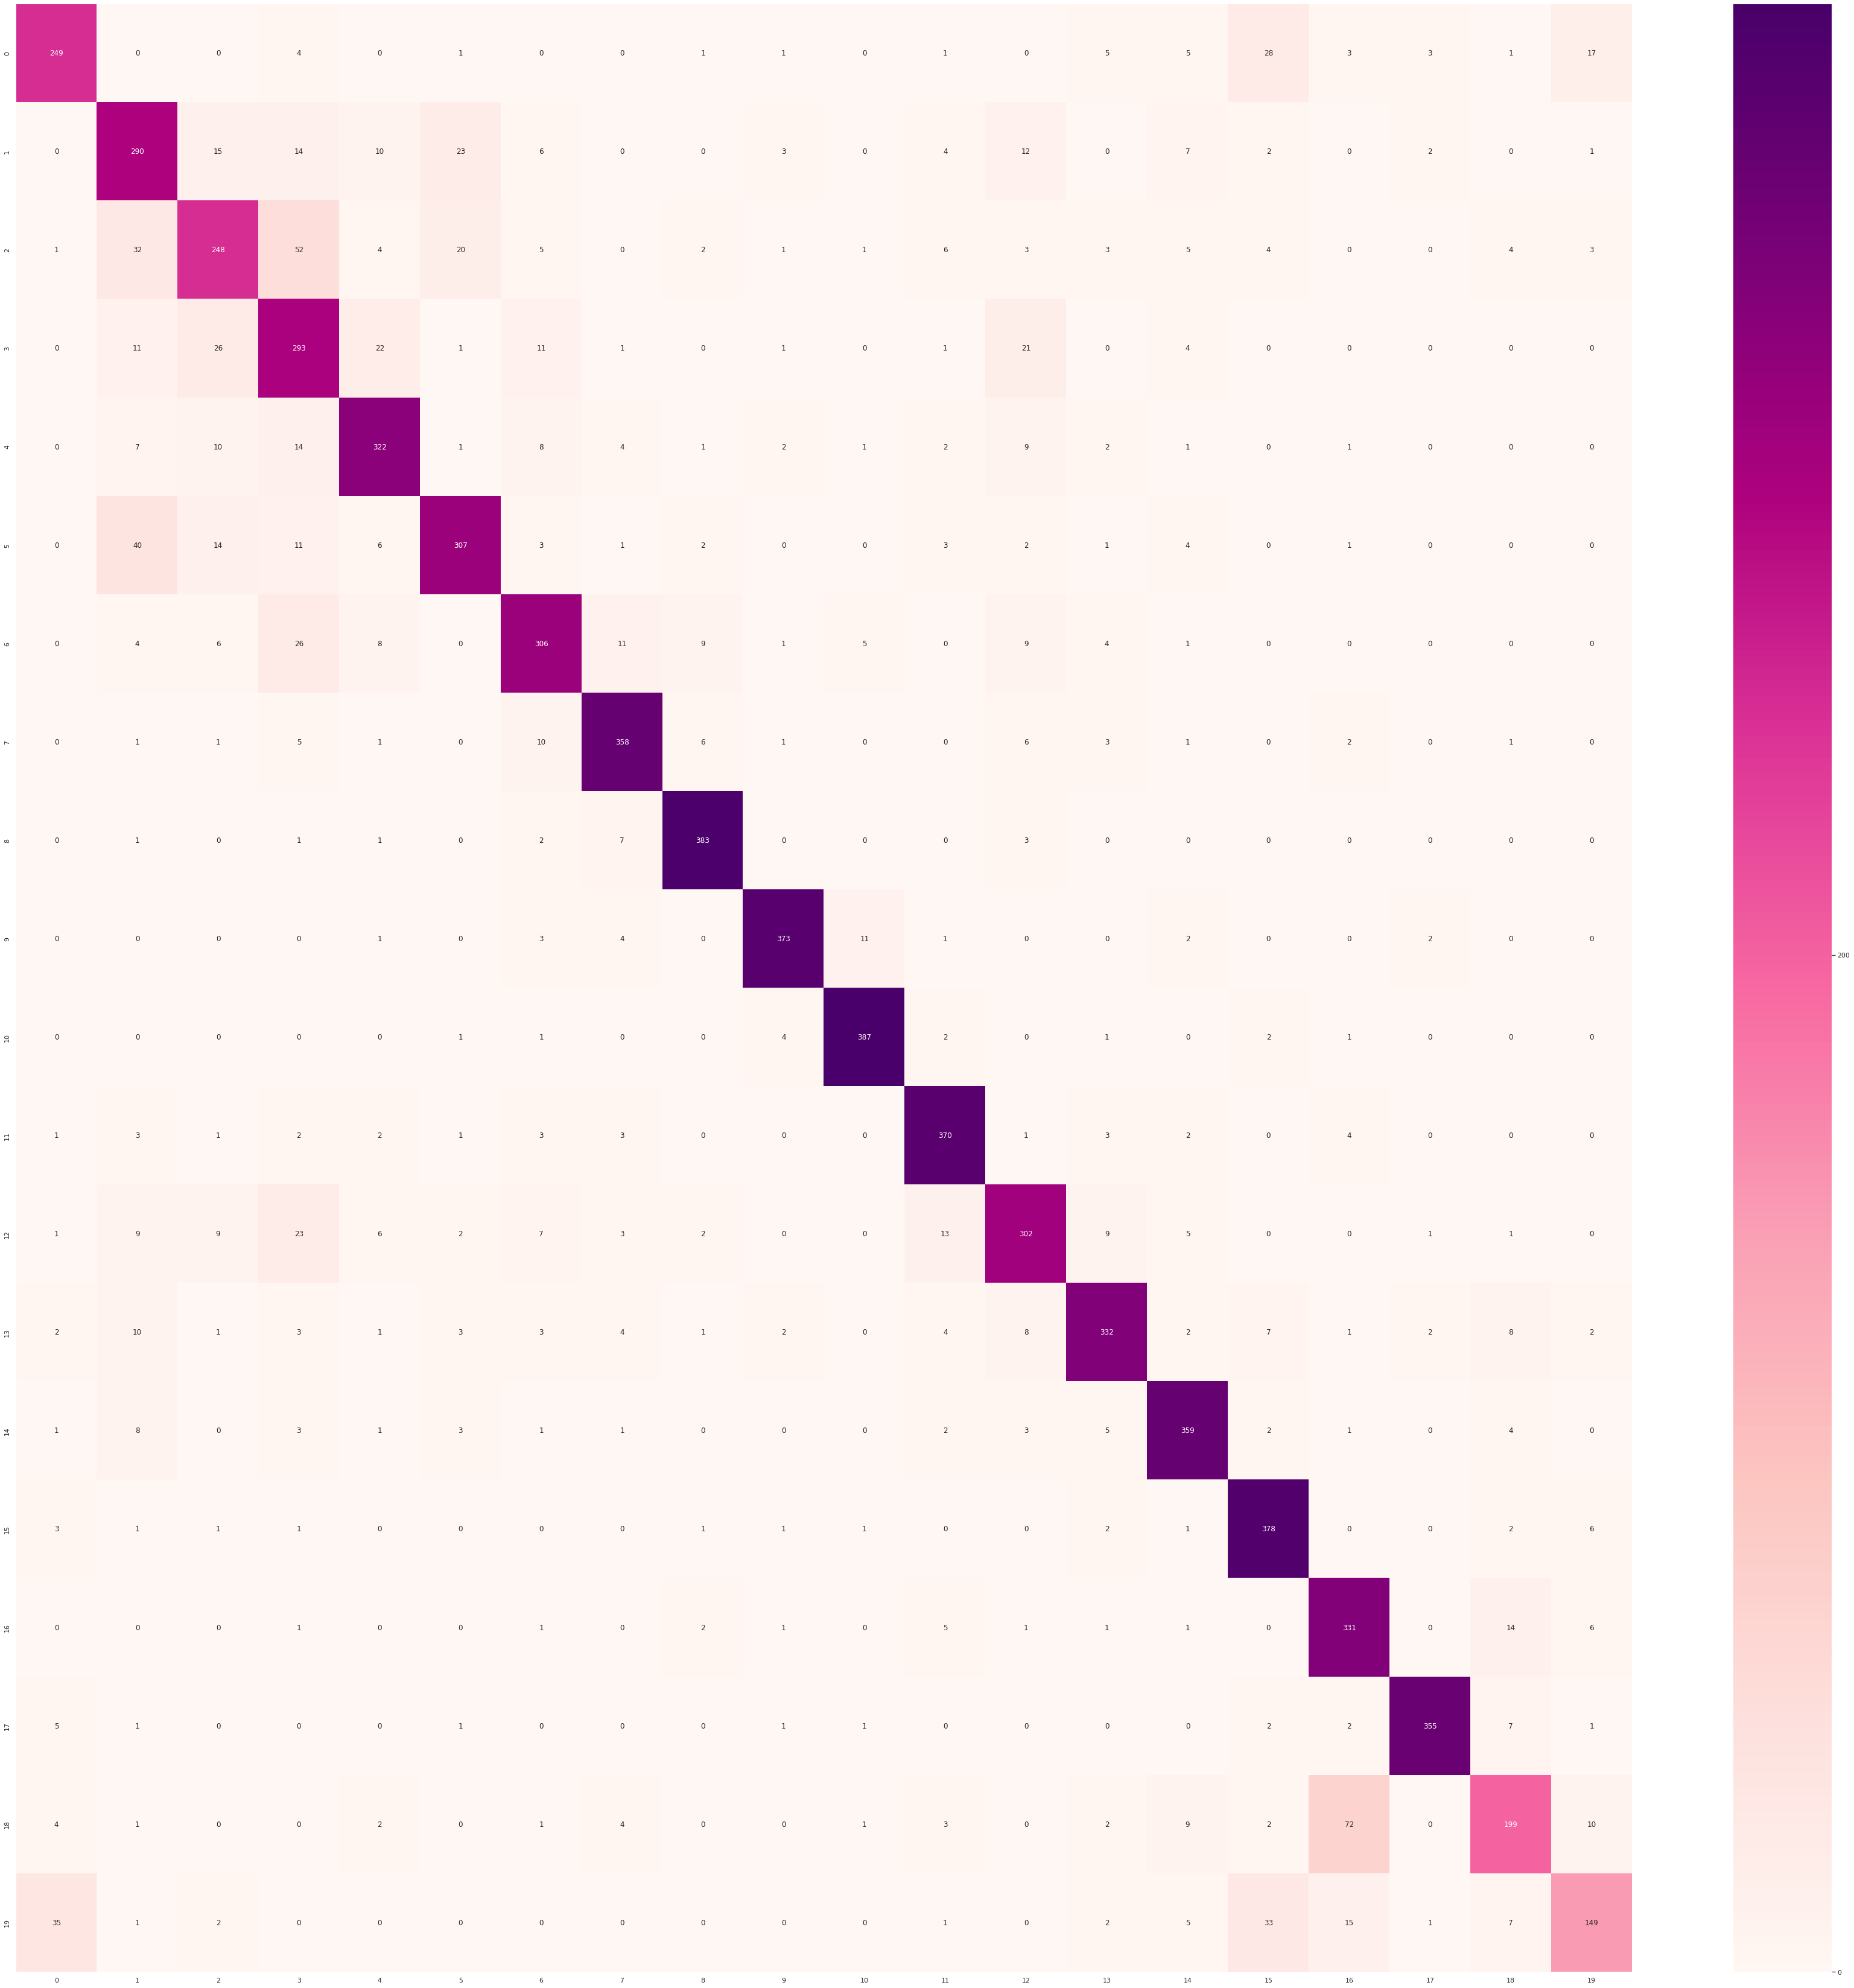

In [88]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import numpy as np; np.random.seed(0)
import seaborn as sns; sns.set_theme()

ax = sns.heatmap(cfmatrix_mnb ,annot=True, fmt="d",cmap="RdPu")
plt.rcParams["figure.figsize"]=50,50
sns.set(font_scale=40)

In [100]:
print("Classification Error of MultinomialNB:", 1 - metrics.accuracy_score(y_test_mnb, y_pred)) 


Classification Error of MultinomialNB: 0.16476367498672329


8.The bonus could be obtained by designing one doc. representation learning method with a clearly improved clustering performance (around 3% NMI value) over the best performance in Step 5. For example, you may try to learn new doc. representations by using RNNs, temporal CNNs, pre-trained word embeddings/BERT, or averaging the learned word embeddings within one document.

DNN(Deep Neural Networks)

In [92]:
from sklearn.datasets import fetch_20newsgroups
from keras.layers import  Dropout, Dense
from keras.models import Sequential
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn import metrics

In [93]:
def TFIDF(X_train, X_test,MAX_NB_WORDS=35000):
    vectorizer_x = TfidfVectorizer(max_features=MAX_NB_WORDS)
    X_train = vectorizer_x.fit_transform(X_train).toarray()
    X_test = vectorizer_x.transform(X_test).toarray()
    print("tf-idf with",str(np.array(X_train).shape[1]),"features")
    return (X_train,X_test)

In [94]:
def Build_Model_DNN_Text(shape, nClasses, dropout=0.5):
    """
    buildModel_DNN_Tex(shape, nClasses,dropout)
    Build Deep neural networks Model for text classification
    Shape is input feature space
    nClasses is number of classes
    """
    model = Sequential()
    node = 512 # number of nodes
    nLayers = 4 # number of  hidden layer

    model.add(Dense(node,input_dim=shape,activation='relu'))
    model.add(Dropout(dropout))
    for i in range(0,nLayers):
        model.add(Dense(node,input_dim=node,activation='relu'))
        model.add(Dropout(dropout))
    model.add(Dense(nClasses, activation='softmax'))

    model.compile(loss='sparse_categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])

    return model

In [95]:
newsgroups_train = fetch_20newsgroups(subset='train')
newsgroups_test = fetch_20newsgroups(subset='test')
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [96]:
from sklearn.metrics import f1_score
X_train_tfidf,X_test_tfidf = TFIDF(X_train,X_test)
model_DNN = Build_Model_DNN_Text(X_train_tfidf.shape[1], 20)
model_DNN.fit(X_train_tfidf, y_train,
                              validation_data=(X_test_tfidf, y_test),
                              epochs=4,
                              batch_size=128,
                              verbose=2)


predicted = model_DNN.predict(X_test_tfidf)

tf-idf with 35000 features
Epoch 1/4
89/89 - 29s - loss: 2.8241 - accuracy: 0.0963 - val_loss: 2.2666 - val_accuracy: 0.3139 - 29s/epoch - 327ms/step
Epoch 2/4
89/89 - 26s - loss: 1.4087 - accuracy: 0.5027 - val_loss: 0.9995 - val_accuracy: 0.6889 - 26s/epoch - 295ms/step
Epoch 3/4
89/89 - 26s - loss: 0.5640 - accuracy: 0.7933 - val_loss: 0.8698 - val_accuracy: 0.7516 - 26s/epoch - 294ms/step
Epoch 4/4
89/89 - 26s - loss: 0.2931 - accuracy: 0.8993 - val_loss: 0.9065 - val_accuracy: 0.7902 - 26s/epoch - 294ms/step


In [98]:
import numpy as np

q = np.argmax(predicted,axis=1)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, q))

0.7902283590015932


Calculating NMI score of DNN model

In [99]:
dnn_all_data_tsne_labels=model_DNN.predict(X_test_tfidf)
q = np.argmax(dnn_all_data_tsne_labels,axis=1)

print("NMI OF DNN MODEL: %0.3f"% metrics.normalized_mutual_info_score(y_test, q))

NMI OF DNN MODEL: 0.715
